In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, chi2_contingency


## Go to the /users/pgrad/mamu/Documents/first/ directory 


In [2]:
# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os
#os.chdir('/users/pgrad/mamu/Documents/first/')

os.chdir('d:/maxim/Dissertation/first/')

## Load datasets


In [3]:
# Load datasets
original_data = pd.read_csv('./datasets/data.csv')
generated_data_llama3 = pd.read_csv('./llama3-8b/results/synthetic_data_llama_3_8b.csv')
generated_data_mistral = pd.read_csv('./mistral-7b/results/synthetic_data_mistral-7b.csv')
generated_data_ctgan = pd.read_csv('./ctgan/results/synthetic_data_ctgan.csv')
generated_data_begreat = pd.read_csv('./begreat/results/synthetic_data_begreat.csv')

## Feature Engineering

In [4]:
# Print the length of the datasets
print('Original data length:', len(original_data))
print('LLAMA-3 length:', len(generated_data_llama3))
print('Mistral length:', len(generated_data_mistral))
print('CTGAN length:', len(generated_data_ctgan))
print('BeGreat length:', len(generated_data_begreat))

# Subset the datasets to the minimum length
min_length = min(len(original_data), len(generated_data_llama3), len(generated_data_mistral), len(generated_data_ctgan), len(generated_data_begreat))
original_data = original_data.sample(min_length)
generated_data_llama3 = generated_data_llama3.sample(min_length)
generated_data_mistral = generated_data_mistral.sample(min_length)
generated_data_ctgan = generated_data_ctgan.sample(min_length)
generated_data_begreat = generated_data_begreat.sample(min_length)


Original data length: 349
LLAMA-3 length: 1580
Mistral length: 672
CTGAN length: 1000
BeGreat length: 300


In [5]:
# List of possible values for the categorical column ' Disease' from both datasets
original_disease_values = original_data['Disease'].unique()
generated_disease_values_llama3 = generated_data_llama3['Disease'].unique()
generated_disease_values_mistral = generated_data_mistral['Disease'].unique()
generated_disease_values_ctgan = generated_data_ctgan['Disease'].unique()
generated_disease_values_begreat = generated_data_begreat['Disease'].unique()


# Print the list of possible values for the categorical column ' Disease' from both datasets
print('Original Disease Values:', original_disease_values)
print('LLAMA-3 Disease Values:', generated_disease_values_llama3)
print('Mistral Disease Values:', generated_disease_values_mistral)
print('CTGAN Disease Values:', generated_disease_values_ctgan)
print('BeGreat Disease Values:', generated_disease_values_begreat)


Original Disease Values: ['Pancreatitis' 'Asthma' 'Kidney Cancer' 'Rubella' 'Cholecystitis'
 'Hypertension' 'Gastroenteritis' 'Hypertensive Heart Disease' 'Migraine'
 'Atherosclerosis' 'Osteoarthritis' 'Hypothyroidism'
 'Urinary Tract Infection (UTI)' 'Depression' 'Stroke' 'Hepatitis'
 'Hepatitis B' 'Ebola Virus' 'Osteoporosis'
 'Systemic Lupus Erythematosus...' 'Turner Syndrome' 'Brain Tumor'
 'HIV/AIDS' 'Typhoid Fever' 'Pneumonia' 'Pneumocystis Pneumonia (PCP)'
 'Chronic Kidney Disease' 'Urinary Tract Infection'
 'Obsessive-Compulsive Disorde...' 'Allergic Rhinitis' 'Dengue Fever'
 'Tonsillitis' 'Hyperthyroidism' 'Lyme Disease' 'Prader-Willi Syndrome'
 'Ulcerative Colitis' 'Tetanus' 'Hemorrhoids' 'Influenza' 'Anemia' 'Mumps'
 'Pneumothorax' 'Eczema' 'Prostate Cancer'
 'Chronic Obstructive Pulmonary Disease (COPD)' 'Diabetes'
 'Thyroid Cancer' "Alzheimer's Disease" 'Liver Disease' 'Psoriasis'
 'Melanoma' 'Anxiety Disorders' 'Bronchitis' 'Coronary Artery Disease'
 'Malaria' 'Common Col

In [6]:
# Define the upper categories
categories = {
    "Respiratory Diseases": [
        'Influenza', 'Common Cold', 'Asthma', 'Allergic Rhinitis', 'Tuberculosis',
        'Sinusitis', 'Bronchitis', 'Pneumonia', 'Chronic Obstructive Pulmonary Disease',
        'Laryngitis', 'Pneumothorax'
    ],
    "Skin Diseases": ['Eczema', 'Psoriasis', 'Acne'],
    "Endocrine and Metabolic Diseases": [
        'Hyperthyroidism', 'Hypothyroidism', 'Diabetes', 'Hyperglycemia', 'Hypoglycemia'
    ],
    "Mental and Behavioral Disorders": [
        'Anxiety Disorders', 'Depression', 'Bipolar Disorder', 'Obsessive-Compulsive Disorder',
        'Autism Spectrum Disorder (ASD)', 'Schizophrenia', 'Eating Disorders (Anorexia, etc.)', 'Dementia'
    ],
    "Cardiovascular Diseases": [
        'Hypertensive Heart Disease', 'Myocardial Infarction (Heart Attack)', 'Coronary Artery Disease',
        'Atherosclerosis', 'Hypertension', 'Stroke'
    ],
    "Gastrointestinal Diseases": [
        'Gastroenteritis', 'Pancreatitis', 'Hepatitis', 'Cirrhosis', 'Ulcerative Colitis', 'Crohn\'s Disease',
        'Irritable Bowel Syndrome', 'Appendicitis', 'Diverticulitis', 'Cholecystitis'
    ],
    "Cancers": [
        'Liver Cancer', 'Kidney Cancer', 'Colorectal Cancer', 'Lung Cancer', 'Brain Tumor', 'Ovarian Cancer',
        'Pancreatic Cancer', 'Esophageal Cancer', 'Prostate Cancer', 'Testicular Cancer', 'Bladder Cancer',
        'Thyroid Cancer', 'Melanoma', 'Lymphoma', 'Breast Cancer'
    ],
    "Neurological Disorders": [
        'Migraine', 'Multiple Sclerosis', 'Epilepsy', 'Cerebral Palsy', 'Parkinson\'s Disease', 'Alzheimer\'s Disease',
        'Spina Bifida', 'Tourette Syndrome'
    ],
    "Musculoskeletal Diseases": [
        'Rheumatoid Arthritis', 'Osteoarthritis', 'Osteoporosis', 'Muscular Dystrophy', 'Fibromyalgia', 'Scoliosis',
        'Gout', 'Osteomyelitis'
    ],
    "Infectious Diseases": [
        'Dengue Fever', 'Rabies', 'Chickenpox', 'Rubella', 'Malaria', 'Zika Virus', 'Tetanus', 'Cholera', 'Sepsis',
        'Ebola Virus', 'Lyme Disease', 'Measles', 'Mumps', 'Typhoid Fever'
    ],
    "Urinary and Reproductive Diseases": [
        'Urinary Tract Infection (UTI)', 'Polycystic Ovary Syndrome (PCOS)', 'Endometriosis', 'Kidney Disease',
        'Chronic Kidney Disease'
    ],
    "Blood Disorders": [
        'Anemia', 'Sickle Cell Anemia', 'Hemophilia'
    ],
    "Genetic Disorders": [
        'Down Syndrome', 'Klinefelter Syndrome', 'Turner Syndrome', 'Marfan Syndrome', 'Prader-Willi Syndrome', 'Williams Syndrome'
    ],
    "Miscellaneous": [
        'Conjunctivitis (Pink Eye)', 'Glaucoma', 'Cataracts', 'Sinusitis', 'Epilepsy', 'Hemorrhoids', 'Sleep Apnea'
    ]
}

# Initialize the category counts
categories_count = {
    "Respiratory Diseases": 0,
    "Skin Diseases": 0,
    "Endocrine and Metabolic Diseases": 0,
    "Mental and Behavioral Disorders": 0,
    "Cardiovascular Diseases": 0,
    "Gastrointestinal Diseases": 0,
    "Cancers": 0,
    "Neurological Disorders": 0,
    "Musculoskeletal Diseases": 0,
    "Infectious Diseases": 0,
    "Urinary and Reproductive Diseases": 0,
    "Blood Disorders": 0,
    "Genetic Disorders": 0,
    "Miscellaneous": 0
}

# Function to classify diseases into categories and update counts
def classify_disease(disease):
    for category, diseases in categories.items():
        if disease in diseases:
            categories_count[category] += 1
            return category
    return 'Miscellaneous'


## Descriptive statistics comparison


#### Check if some of the diseases are new in the generated dataset


In [7]:
# Check if some of the diseases are new in the generated dataset
new_diseases_llama3 = [disease for disease in generated_disease_values_llama3 if disease not in original_disease_values]
print(f'New diseases in LLAMA-3: {new_diseases_llama3} \n')

new_diseases_mistral = [disease for disease in generated_disease_values_mistral if disease not in original_disease_values]
print(f'New diseases in Mistral: {new_diseases_mistral} \n')

new_diseases_ctgan = [disease for disease in generated_disease_values_ctgan if disease not in original_disease_values]
print(f'New diseases in CTGAN: {new_diseases_ctgan} \n')

new_diseases_begreat = [disease for disease in generated_disease_values_begreat if disease not in original_disease_values]
print(f'New diseases in BeGreat: {new_diseases_begreat} \n')

New diseases in LLAMA-3: ['Q Fever', "Sjogren's Syndrome", 'Heart Failure', 'Otitis Media', 'Chronic Obstructive Pulmonary Disease', 'Celiac Disease', 'Tularemia', 'Tendinitis', 'Pleurisy', 'Irritable Bowel Syndrome', 'Hypertensive Crisis', 'Scleroderma', 'Diabetes Mellitus', 'Chronic Pancreatitis', 'Gastroesophageal Reflux Disease', 'Chronic Fatigue Syndrome', 'Zollinger-Ellison Syndrome', 'Guillain-Barre Syndrome', 'Meningitis', 'Idiopathic Pulmonary Fibrosis', 'Churg-Strauss Syndrome', "Wegener's Granulomatosis", 'Silicosis', 'Psoriatic Arthritis', 'Vitiligo', 'Bursitis', 'Interstitial Cystitis', 'Pseudomonas Pneumonia', 'Gastroesophageal Reflux Disease (GERD)', 'Kidney Stones', 'Pulmonary Embolism', 'Carpal Tunnel Syndrome', 'Human Immunodeficiency Virus', 'Lupus', 'Cellulitis', 'Hypersensitivity Pneumonitis', 'Menorrhagia', 'Thyroiditis', "Addison's Disease", "Raynaud's Phenomenon", 'Glaucoma', 'Xanthoma', 'Bronchiectasis', 'Endocarditis', "Raynaud's Disease", 'Sickle Cell Anemia'

In [8]:
# Create a new column 'Disease Category' in both datasets
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)
generated_data_llama3['Disease Category'] = generated_data_llama3['Disease'].apply(classify_disease)
generated_data_mistral['Disease Category'] = generated_data_mistral['Disease'].apply(classify_disease)
generated_data_ctgan['Disease Category'] = generated_data_ctgan['Disease'].apply(classify_disease)
generated_data_begreat['Disease Category'] = generated_data_begreat['Disease'].apply(classify_disease)

### General description of both datasets

In [9]:
# Descriptive statistics comparison
print("Original Data Description:\n", original_data.describe())
print("Generated Data Description (LLAMA-3):\n", generated_data_llama3.describe())
print("Generated Data Description (Mistral):\n", generated_data_mistral.describe())
print("Generated Data Description (CTGAN):\n", generated_data_ctgan.describe())
print("Generated Data Description (BeGreat):\n", generated_data_begreat.describe())

# Descriptive statistics comparison for categorical columns
print("Original Data Description for Categorical Columns:\n", original_data.describe(include=['object']))
print("Generated Data Description for Categorical Columns (LLAMA-3):\n", generated_data_llama3.describe(include=['object']))
print("Generated Data Description for Categorical Columns (Mistral):\n", generated_data_mistral.describe(include=['object']))
print("Generated Data Description for Categorical Columns (CTGAN):\n", generated_data_ctgan.describe(include=['object']))
print("Generated Data Description for Categorical Columns (BeGreat):\n", generated_data_begreat.describe(include=['object']))


Original Data Description:
               Age
count  300.000000
mean    46.390000
std     12.700482
min     25.000000
25%     35.000000
50%     45.000000
75%     55.000000
max     90.000000
Generated Data Description (LLAMA-3):
               Age
count  300.000000
mean    42.326667
std     11.597772
min     10.000000
25%     35.000000
50%     40.000000
75%     50.000000
max     70.000000
Generated Data Description (Mistral):
               Age
count  300.000000
mean    34.323333
std      6.184898
min     17.000000
25%     30.000000
50%     35.000000
75%     40.000000
max     55.000000
Generated Data Description (CTGAN):
               Age
count  300.000000
mean    41.346667
std     13.318826
min     19.000000
25%     32.000000
50%     39.000000
75%     48.000000
max     86.000000
Generated Data Description (BeGreat):
               Age
count  300.000000
mean    47.536667
std     12.033481
min     25.000000
25%     40.000000
50%     45.000000
75%     55.000000
max     90.000000
Original

### Plot histograms

<Figure size 1500x500 with 0 Axes>

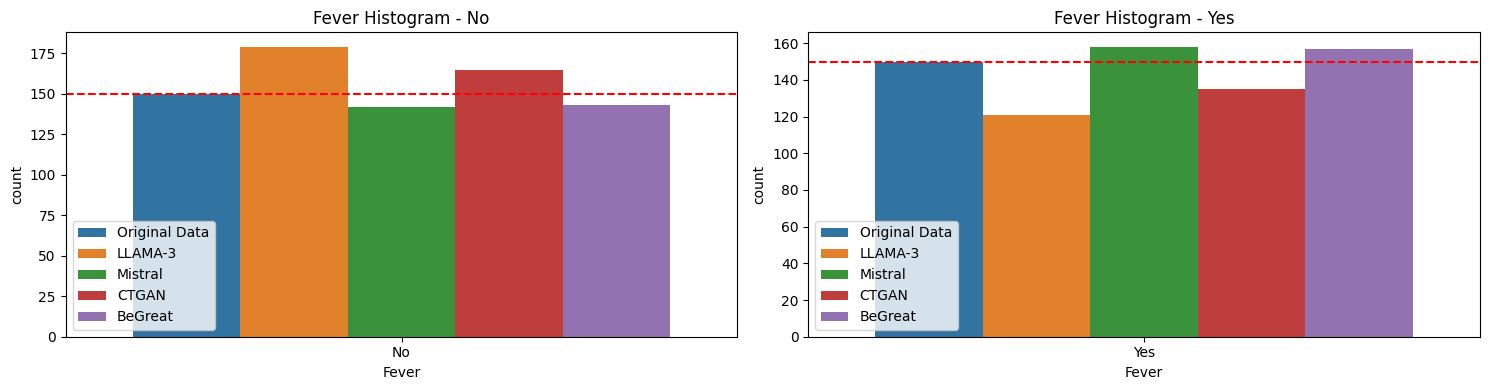

<Figure size 1500x500 with 0 Axes>

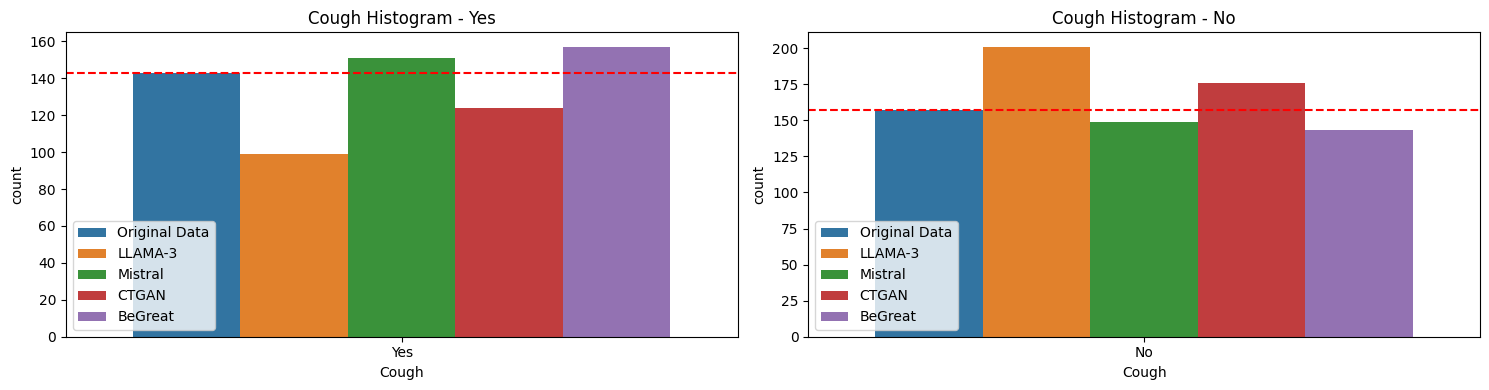

<Figure size 1500x500 with 0 Axes>

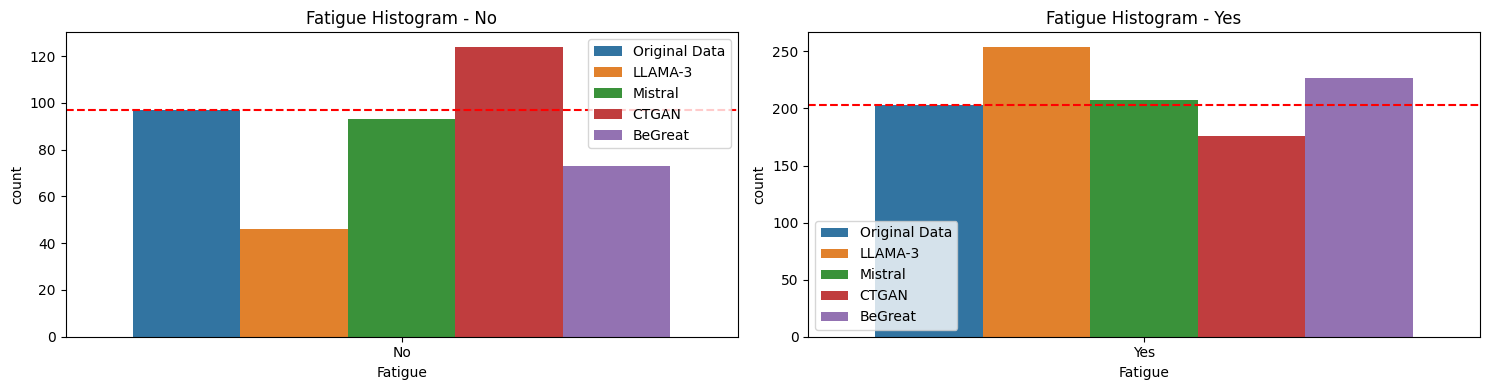

<Figure size 1500x500 with 0 Axes>

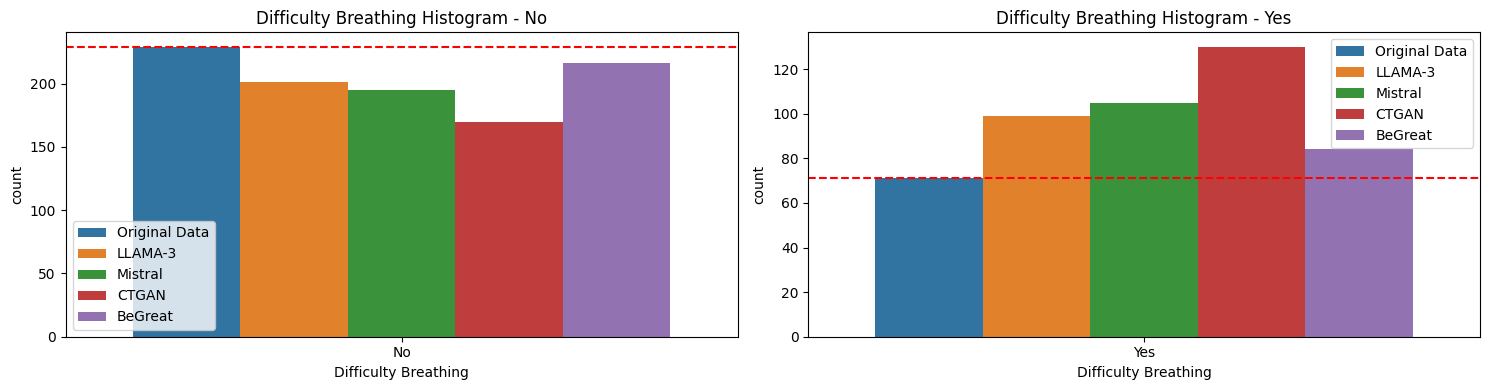

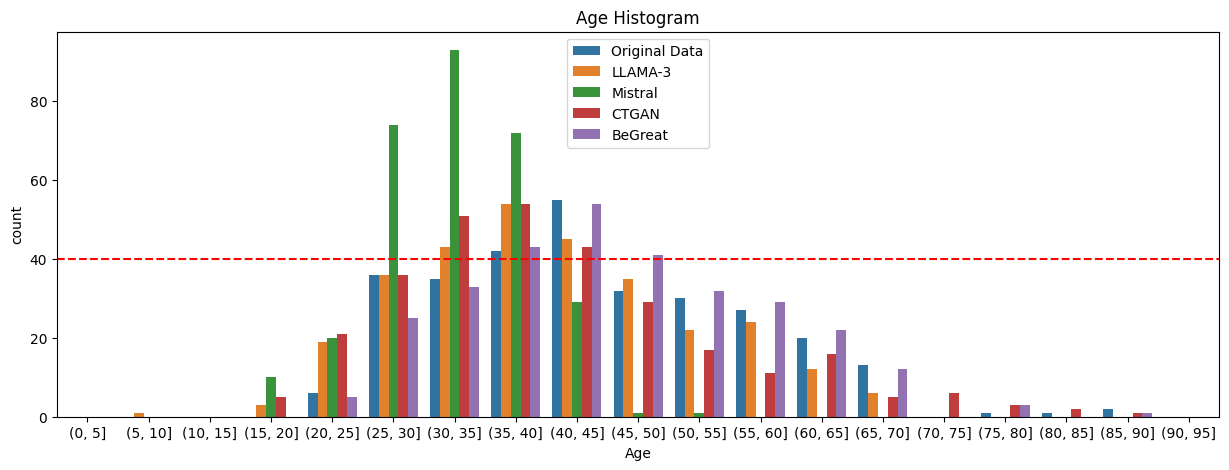

<Figure size 1500x500 with 0 Axes>

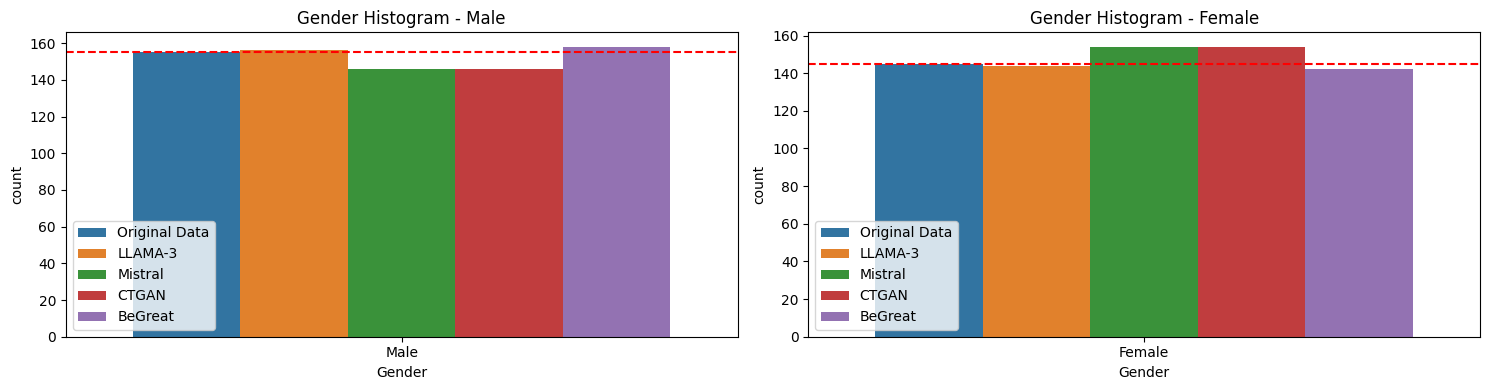

<Figure size 1500x500 with 0 Axes>

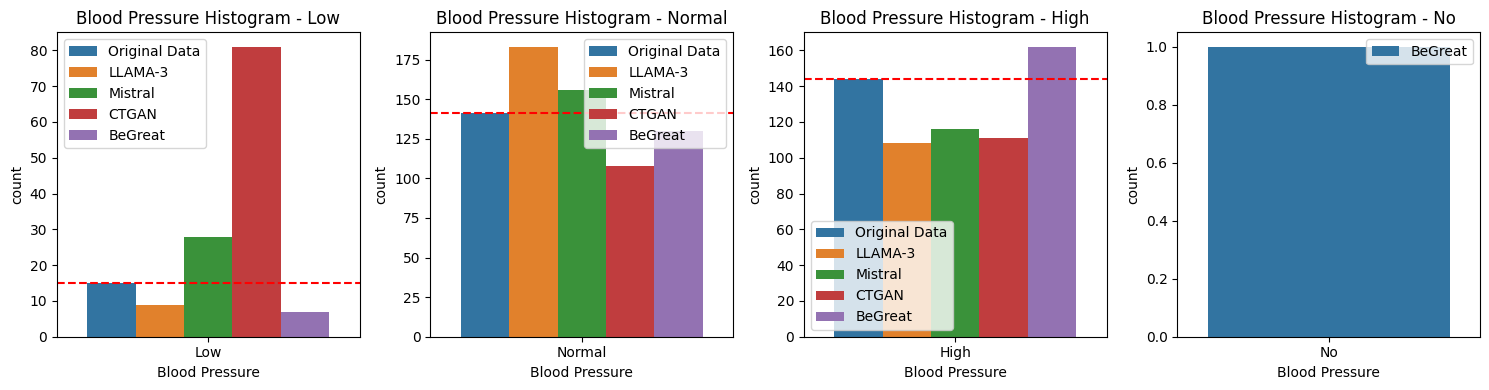

<Figure size 1500x500 with 0 Axes>

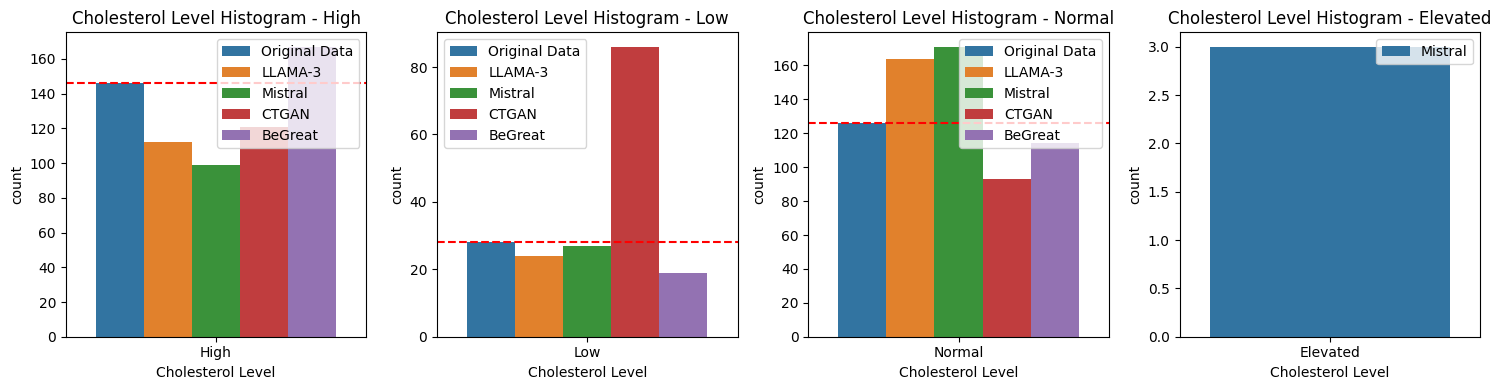

<Figure size 1500x500 with 0 Axes>

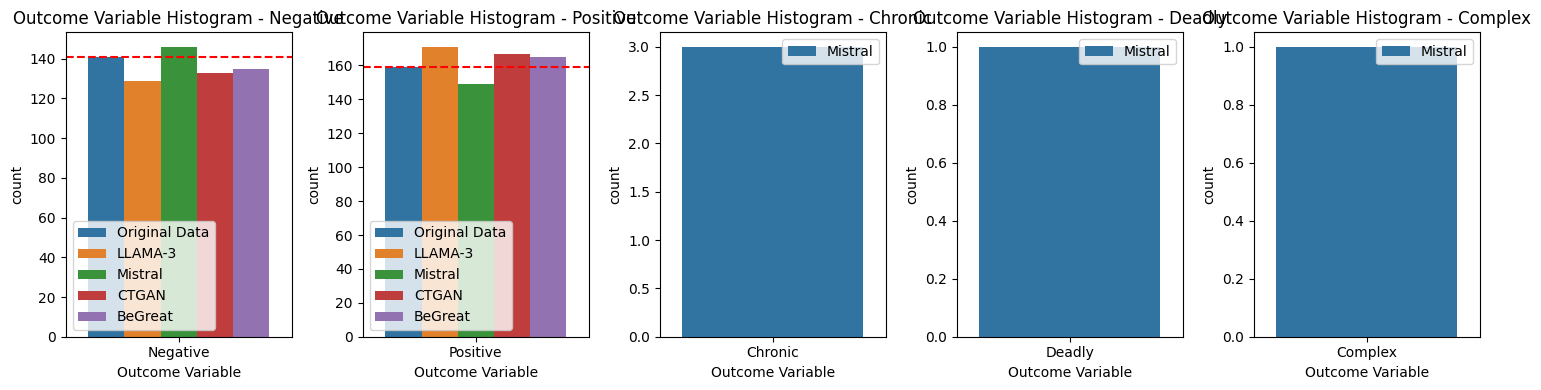

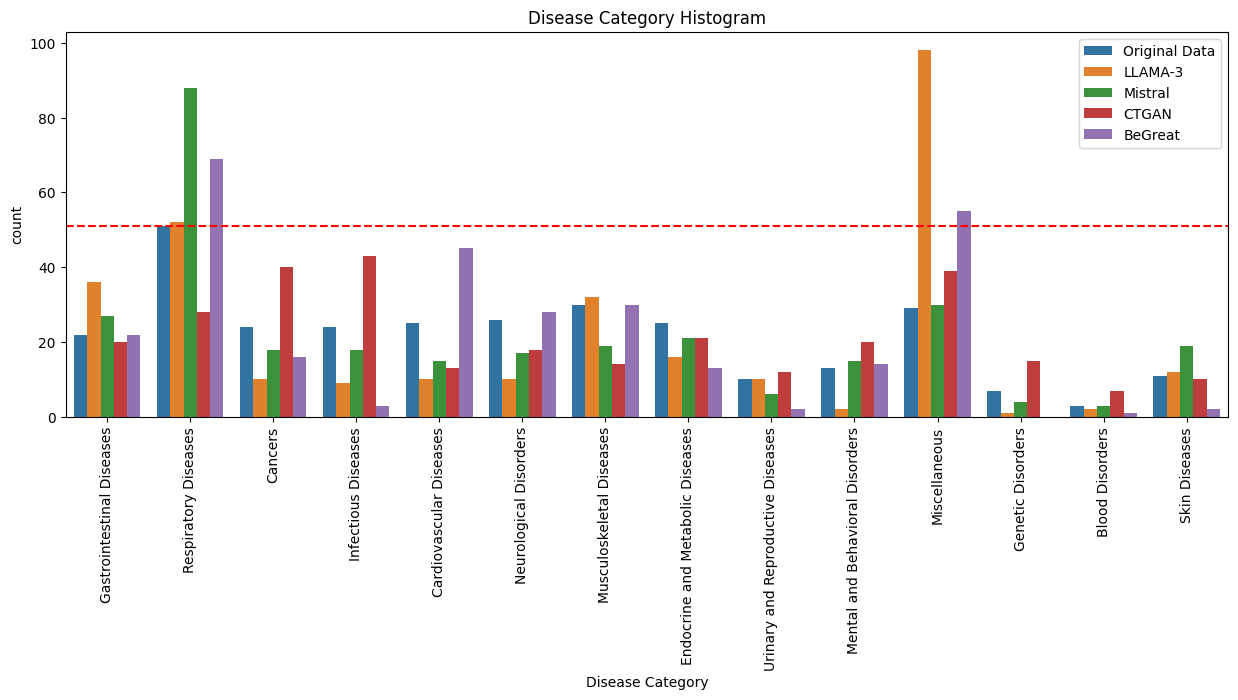

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming the dataframes original_data, generated_data_llama3, generated_data_mistral, generated_data_ctgan, and generated_data_begreat are already defined

# Melt the dataframes to long format for easier plotting
original_data['Source'] = 'Original Data'
generated_data_llama3['Source'] = 'LLAMA-3'
generated_data_mistral['Source'] = 'Mistral'
generated_data_ctgan['Source'] = 'CTGAN'
generated_data_begreat['Source'] = 'BeGreat'

# Concatenate all dataframes
all_data = pd.concat([original_data, generated_data_llama3, generated_data_mistral, generated_data_ctgan, generated_data_begreat])

for col in original_data.columns:
    if col == 'Disease' or col == 'Source':
        continue

    plt.figure(figsize=(15, 5))

    if col == 'Age':
        bins = np.arange(0, 100, 5)
        all_data[col] = pd.cut(all_data[col], bins=bins)

    if col == 'Disease Category':
        plt.xticks(rotation=90)

    if col in ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']:
        # Get unique statuses for the current column
        statuses = all_data[col].unique()
        # Create a figure and a set of subplots
        fig, axs = plt.subplots(1, len(statuses), figsize=(15, 4))
        
        for index, status in enumerate(statuses):
            # Select the subplot
            ax = axs[index]
            # Filter data for the current status
            status_data = all_data[all_data[col] == status]
            # Plot the data
            sns.countplot(data=status_data, x=col, hue='Source', ax=ax)
            # Calculate the max value for the original data with the current status
            max_val = original_data[original_data[col] == status][col].value_counts().max()
            # Draw a horizontal line at the max value
            ax.axhline(y=max_val, color='r', linestyle='--')
            # Set the title for the subplot
            ax.set_title(f'{col} Histogram - {status}')
            # Set legend for the subplot
            ax.legend()
        
        # Adjust the layout
        plt.tight_layout()
        # Show the plot
        plt.show()
        

    else:
        sns.countplot(data=all_data, x=col, hue='Source')
        # Draw a horizontal line at the max value of original data
        max_val = original_data[col].value_counts().max()
        plt.axhline(y=max_val, color='r', linestyle='--')
        plt.title(f'{col} Histogram')
        plt.legend()
        plt.show()

## Check if the distributions of the original and generated data are the same

In [44]:
# Check if the distributions of the original and generated data are the same
for col in original_data.columns:

    print(f'Feature: {col}')
    ks_stat, p_val = ks_2samp(original_data[col], generated_data[col])
    print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
    if p_val < 0.05:
        print(f'The distributions of the feature {col} are different')
    else:
        print(f'The distributions of the feature {col} are the same')
    print()

Feature: Disease
KS Statistic: 0.0830945558739255, p-value: 0.17967286200122262
The distributions of the feature Disease are the same

Feature: Fever
KS Statistic: 0.06303724928366762, p-value: 0.4925357877061418
The distributions of the feature Fever are the same

Feature: Cough
KS Statistic: 0.011461318051575931, p-value: 1.0
The distributions of the feature Cough are the same

Feature: Fatigue
KS Statistic: 0.1318051575931232, p-value: 0.004613289387485903
The distributions of the feature Fatigue are different

Feature: Difficulty Breathing
KS Statistic: 0.15759312320916904, p-value: 0.00033608347919553334
The distributions of the feature Difficulty Breathing are different

Feature: Age
KS Statistic: 0.34097421203438394, p-value: 2.226013468246401e-18
The distributions of the feature Age are different

Feature: Gender
KS Statistic: 0.0028653295128939827, p-value: 1.0
The distributions of the feature Gender are the same

Feature: Blood Pressure
KS Statistic: 0.19197707736389685, p-va

/users/pgrad/mamu/Documents/first/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


### TODO: Check again the code below

In [27]:
# Categorical distribution comparison

# Create a new column 'Disease Category' in both datasets
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)
generated_data_llama3['Disease Category'] = generated_data_llama3['Disease'].apply(classify_disease)
generated_data_mistral['Disease Category'] = generated_data_mistral['Disease'].apply(classify_disease)
generated_data_ctgan['Disease Category'] = generated_data_ctgan['Disease'].apply(classify_disease)
generated_data_begreat['Disease Category'] = generated_data_begreat['Disease'].apply(classify_disease)


# Check if the distributions of the original and generated data are the same
print('Disease Category Distribution Comparison:')
print(original_data['Disease Category'].value_counts())
print("\n")
print(generated_data_llama3['Disease Category'].value_counts())
print("\n")
print(generated_data_mistral['Disease Category'].value_counts())
print("\n")
print(generated_data_ctgan['Disease Category'].value_counts())
print("\n")
print(generated_data_begreat['Disease Category'].value_counts())
print("\n")


Disease Category Distribution Comparison:
Respiratory Diseases                 48
Cardiovascular Diseases              28
Musculoskeletal Diseases             28
Miscellaneous                        27
Gastrointestinal Diseases            26
Cancers                              25
Infectious Diseases                  25
Neurological Disorders               24
Endocrine and Metabolic Diseases     21
Mental and Behavioral Disorders      14
Skin Diseases                        12
Urinary and Reproductive Diseases    11
Genetic Disorders                     8
Blood Disorders                       3
Name: Disease Category, dtype: int64


Miscellaneous                        114
Respiratory Diseases                  50
Gastrointestinal Diseases             43
Musculoskeletal Diseases              21
Endocrine and Metabolic Diseases      18
Neurological Disorders                 9
Infectious Diseases                    9
Skin Diseases                          7
Cancers                        

KS Statistic: 0.18666666666666668, p-value: 5.522790313356146e-05
The distributions of the Disease Category are different
Chi-square Statistic: 100.43857869073555, p-value: 0.6848700827319011
The distributions of the Disease Category are the same


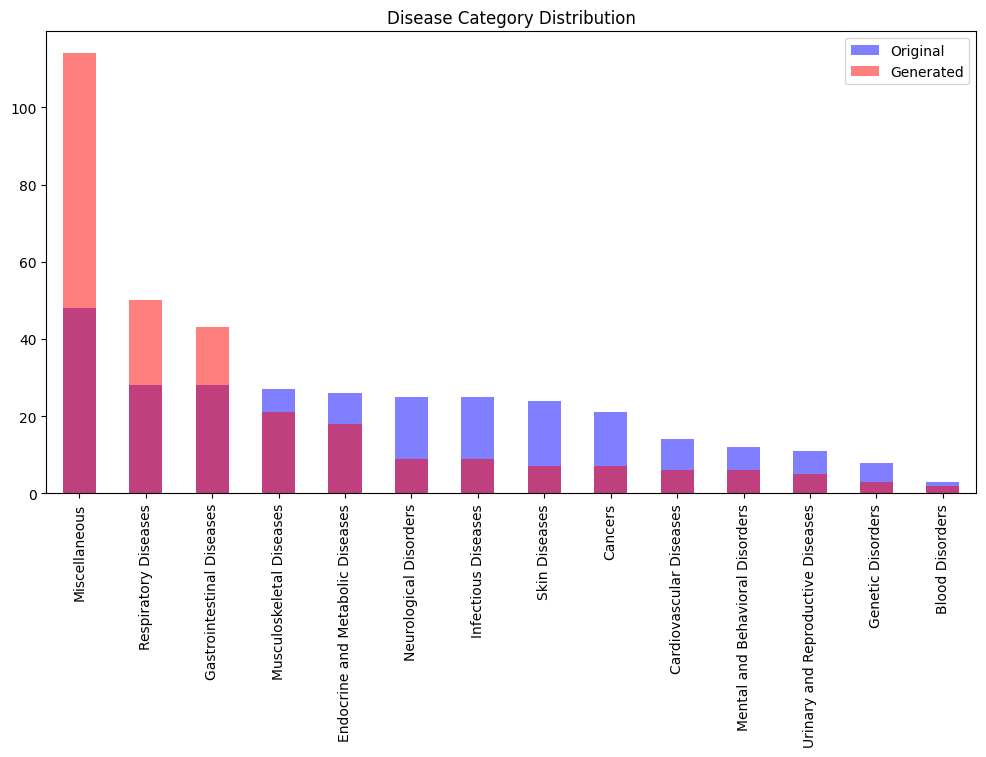

In [28]:
# Kolmogorov-Smirnov test for categorical data
ks_stat, p_val = ks_2samp(original_data['Disease Category'], generated_data_llama3['Disease Category'])
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Chi-square test for categorical data
contingency_table = pd.crosstab(original_data['Disease Category'], generated_data_llama3['Disease Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Plot the distribution of the Disease Category bars side by side
plt.figure(figsize=(12, 6))
original_data['Disease Category'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
generated_data_llama3['Disease Category'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()


KS Statistic: 0.18666666666666668, p-value: 5.522790313356146e-05
The distributions of the Disease Category are different
Chi-square Statistic: 100.43857869073555, p-value: 0.6848700827319011
The distributions of the Disease Category are the same


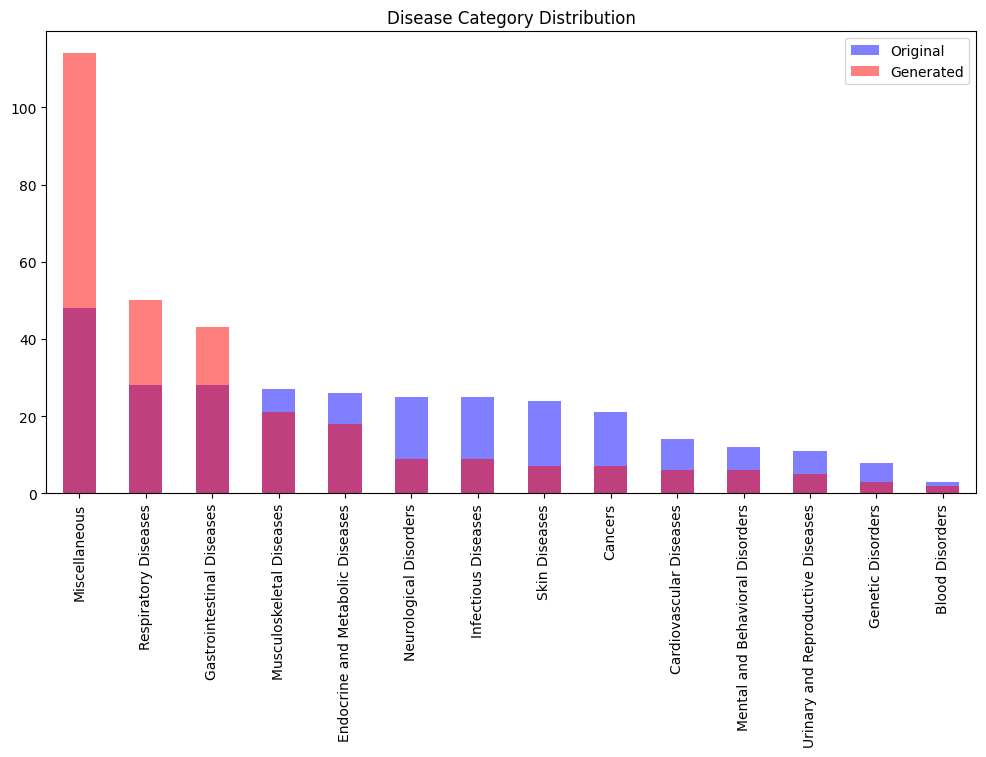

In [29]:
# Kolmogorov-Smirnov test for categorical data
ks_stat, p_val = ks_2samp(original_data['Disease Category'], generated_data_llama3['Disease Category'])
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Chi-square test for categorical data
contingency_table = pd.crosstab(original_data['Disease Category'], generated_data_llama3['Disease Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Plot the distribution of the Disease Category bars side by side
plt.figure(figsize=(12, 6))
original_data['Disease Category'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
generated_data_llama3['Disease Category'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()

KS Statistic: 0.14333333333333334, p-value: 0.004164755648201053
The distributions of the Disease Category are different
Chi-square Statistic: 150.75813953933329, p-value: 0.6034517293789661
The distributions of the Disease Category are the same


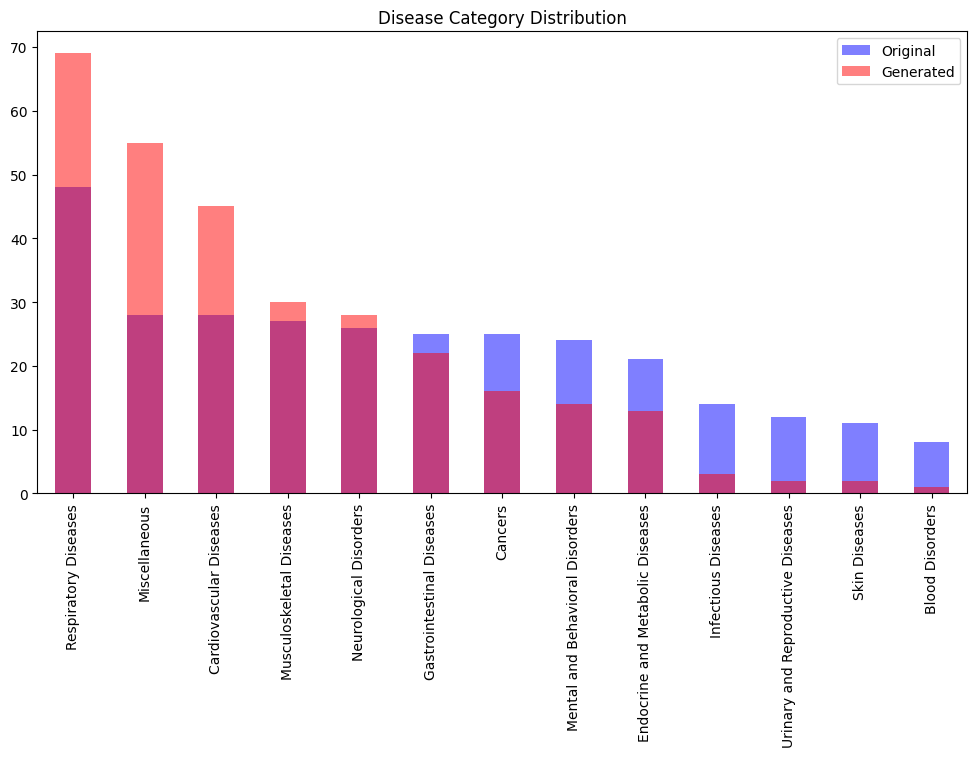

In [30]:
# Kolmogorov-Smirnov test for categorical data
ks_stat, p_val = ks_2samp(original_data['Disease Category'], generated_data_mistral['Disease Category'])
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Chi-square test for categorical data
contingency_table = pd.crosstab(original_data['Disease Category'], generated_data_begreat['Disease Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Plot the distribution of the Disease Category bars side by side
plt.figure(figsize=(12, 6))
original_data['Disease Category'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
generated_data_begreat['Disease Category'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()

KS Statistic: 0.16333333333333333, p-value: 0.0006538374533623971
The distributions of the Disease Category are different
Chi-square Statistic: 186.9231441398108, p-value: 0.16394431227376685
The distributions of the Disease Category are the same


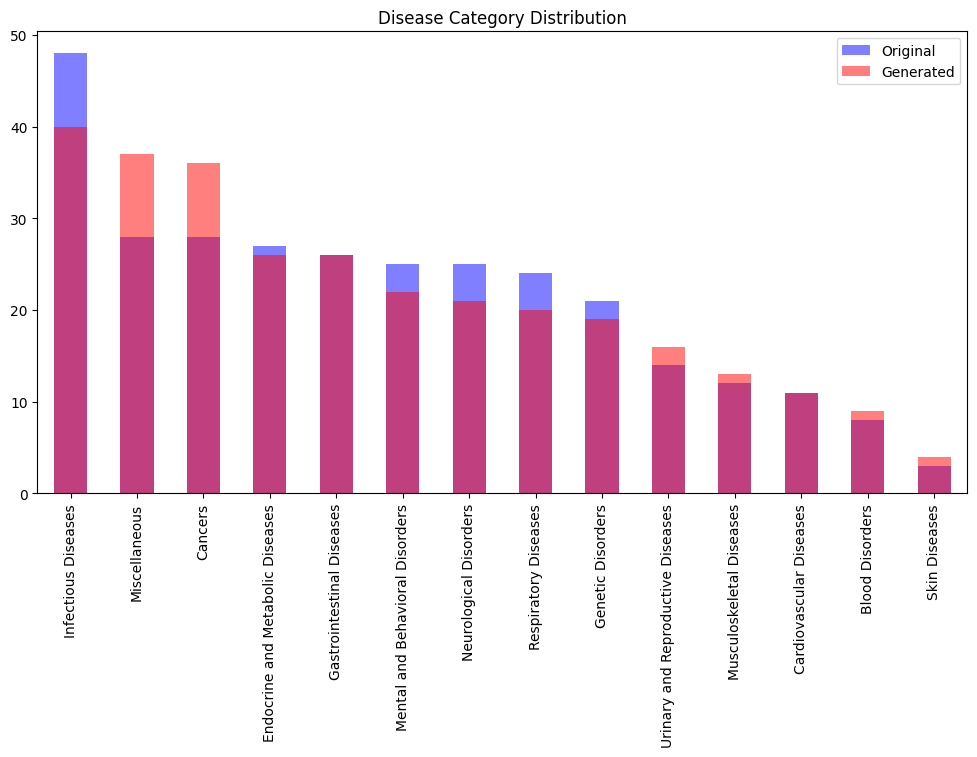

In [31]:
# Kolmogorov-Smirnov test for categorical data
ks_stat, p_val = ks_2samp(original_data['Disease Category'], generated_data_ctgan['Disease Category'])
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Chi-square test for categorical data
contingency_table = pd.crosstab(original_data['Disease Category'], generated_data_ctgan['Disease Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Plot the distribution of the Disease Category bars side by side
plt.figure(figsize=(12, 6))
original_data['Disease Category'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
generated_data_ctgan['Disease Category'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()

KS Statistic: 0.12, p-value: 0.026515154829730034
The distributions of the Disease Category are different
Chi-square Statistic: 150.75813953933329, p-value: 0.6034517293789661
The distributions of the Disease Category are the same


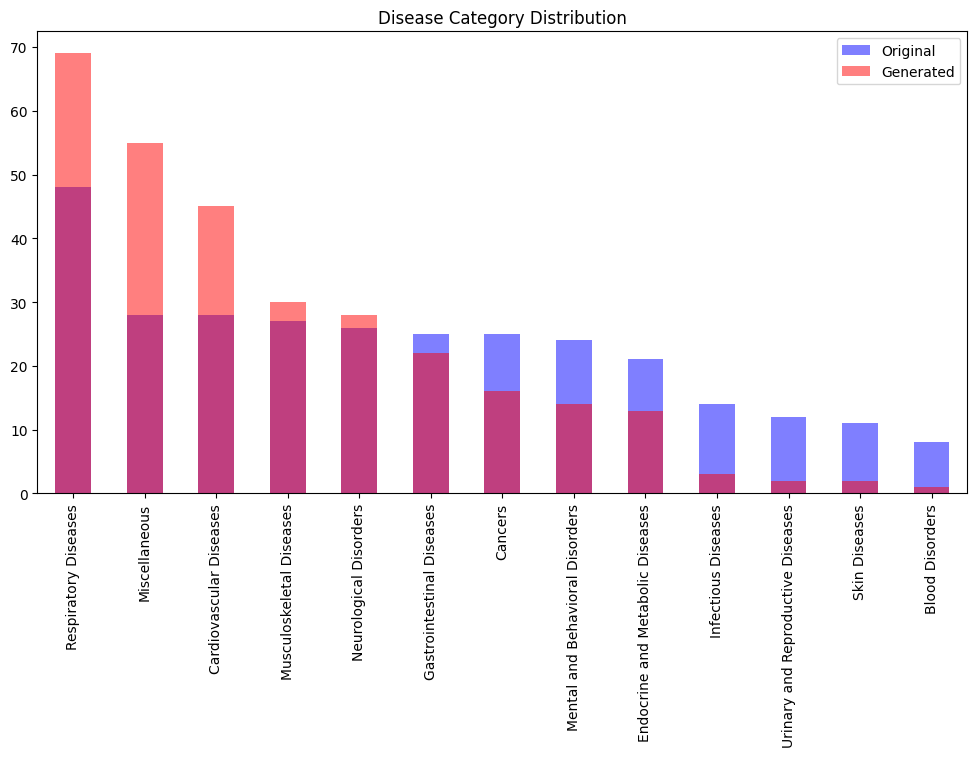

In [32]:
# Kolmogorov-Smirnov test for categorical data
ks_stat, p_val = ks_2samp(original_data['Disease Category'], generated_data_begreat['Disease Category'])
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Chi-square test for categorical data
contingency_table = pd.crosstab(original_data['Disease Category'], generated_data_begreat['Disease Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Plot the distribution of the Disease Category bars side by side
plt.figure(figsize=(12, 6))
original_data['Disease Category'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
generated_data_begreat['Disease Category'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()

## Correlation comparison


### One-hot encode the 'Disease Category' column


In [33]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded_llama3 = encoder.transform(generated_data_llama3[['Disease Category']])
generated_encoded_mistral = encoder.transform(generated_data_mistral[['Disease Category']])
generated_encoded_ctgan = encoder.transform(generated_data_ctgan[['Disease Category']])
generated_encoded_begreat = encoder.transform(generated_data_begreat[['Disease Category']])
print(original_encoded.toarray())
print(generated_encoded_llama3.toarray())
print(generated_encoded_mistral.toarray())
print(generated_encoded_ctgan.toarray())
print(generated_encoded_begreat.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Calculate the cosine similarity between the one-hot encoded 'Disease Category' columns


In [34]:
# Calculate the cosine similarity between the one-hot encoded 'Disease Category' columns
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(original_encoded, generated_encoded_llama3)
print(f'Cosine Similarity for Llama3: {cosine_sim.mean()}')

cosine_sim = cosine_similarity(original_encoded, generated_encoded_mistral)
print(f'Cosine Similarity for Mistral: {cosine_sim.mean()}')

cosine_sim = cosine_similarity(original_encoded, generated_encoded_ctgan)
print(f'Cosine Similarity for CTGAN: {cosine_sim.mean()}')

cosine_sim = cosine_similarity(original_encoded, generated_encoded_begreat)
print(f'Cosine Similarity for BeGreat: {cosine_sim.mean()}')

Cosine Similarity for Llama3: 0.09554444444444445
Cosine Similarity for Mistral: 0.09985555555555556
Cosine Similarity for CTGAN: 0.07742222222222223
Cosine Similarity for BeGreat: 0.10148888888888889


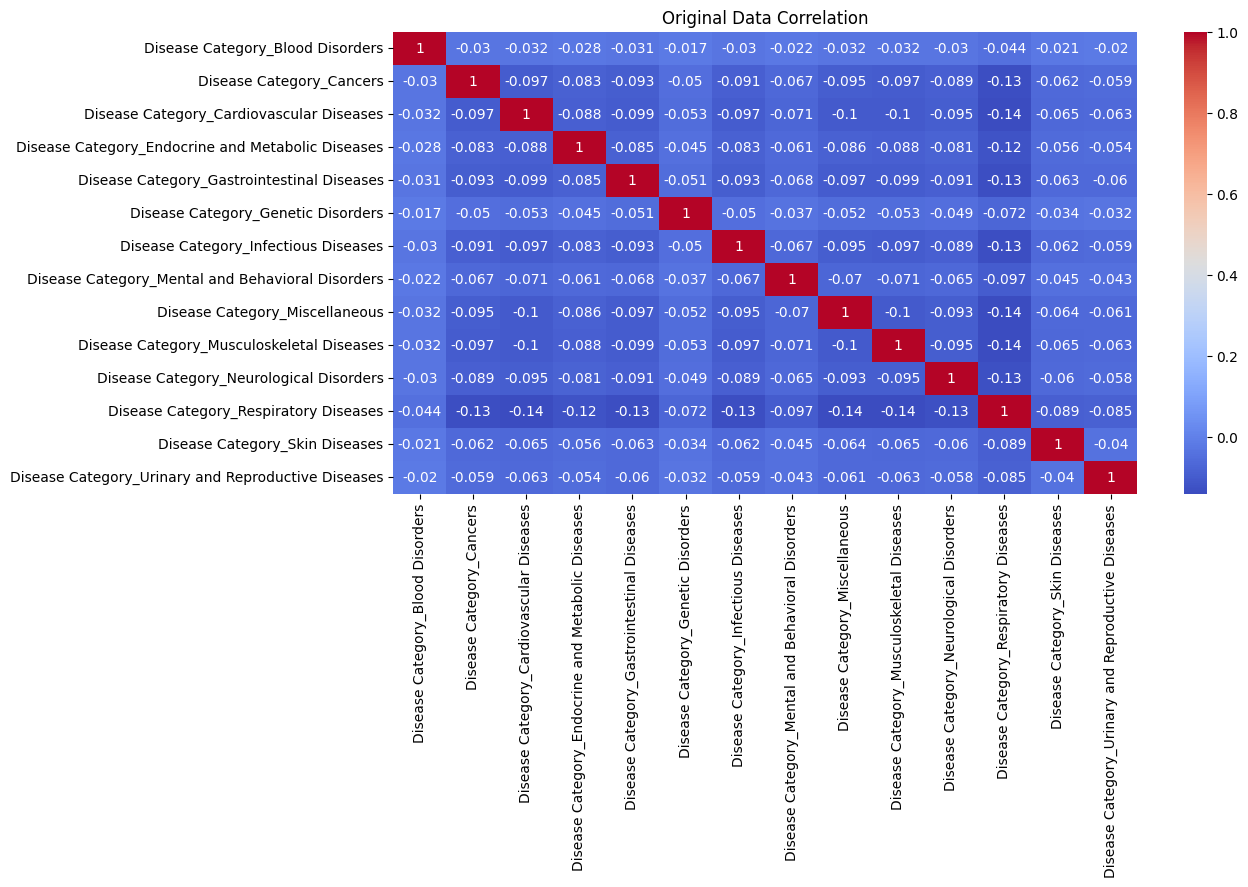

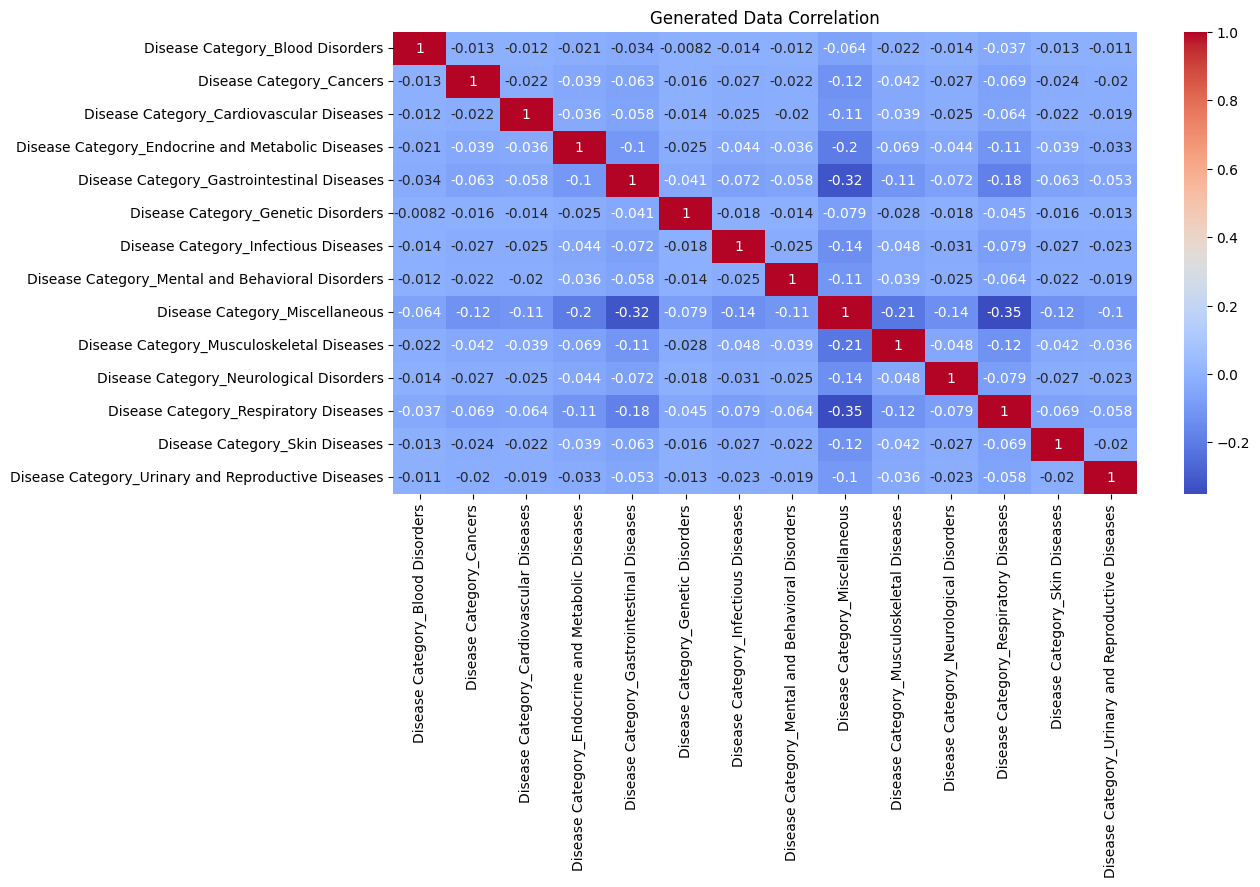

KS Statistic: 0.3877551020408163, p-value: 1.5712098384330253e-13
The correlation matrices are different
Chi-square Statistic: 88.13708888969484, p-value: 0.9999999587849999
The correlation matrices are the same


In [35]:
# Combine unique disease categories from both datasets
all_disease_categories = np.unique(np.concatenate((original_data['Disease Category'].unique(), generated_data_llama3['Disease Category'].unique())))

# One-hot encoding the combined disease categories
encoder = OneHotEncoder(categories=[all_disease_categories])
original_encoded = encoder.fit_transform(original_data[['Disease Category']]).toarray()
generated_encoded = encoder.transform(generated_data_llama3[['Disease Category']]).toarray()

# Creating DataFrames from the encoded data
original_encoded_df = pd.DataFrame(original_encoded, columns=encoder.get_feature_names_out(['Disease Category']))
generated_encoded_df = pd.DataFrame(generated_encoded, columns=encoder.get_feature_names_out(['Disease Category']))

# Calculate correlation matrices
original_corr = original_encoded_df.corr()
generated_corr = generated_encoded_df.corr()

# Plot correlation matrices
plt.figure(figsize=(12, 6))
sns.heatmap(original_corr, annot=True, cmap='coolwarm')
plt.title('Original Data Correlation')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(generated_corr, annot=True, cmap='coolwarm')
plt.title('Generated Data Correlation')
plt.show()

# Check if the correlation matrices are the same using KS test
ks_stat, p_val = ks_2samp(original_corr.values.flatten(), generated_corr.values.flatten())
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

# Check if the correlation matrices are the same using Chi-square test
chi2, p, dof, expected = chi2_contingency(np.abs(original_corr.values))
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

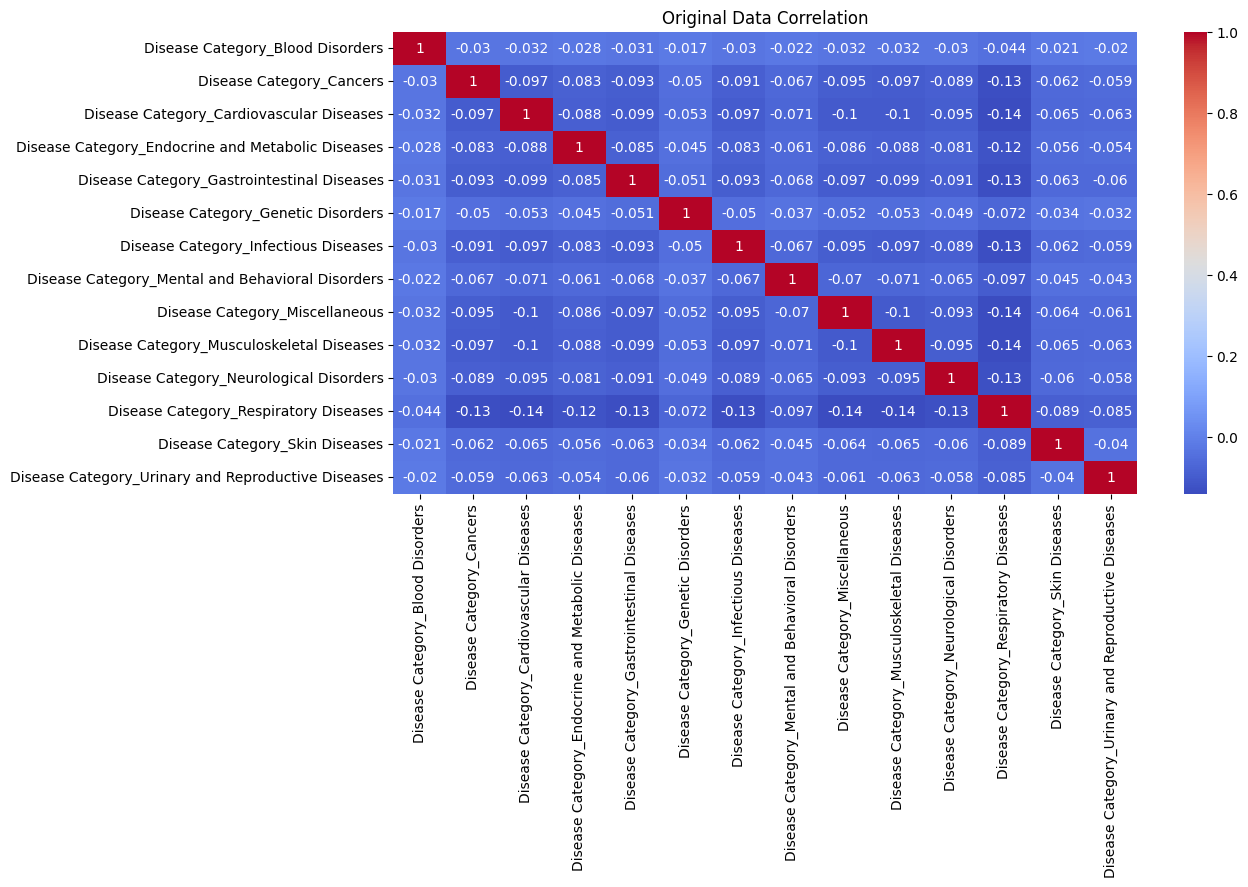

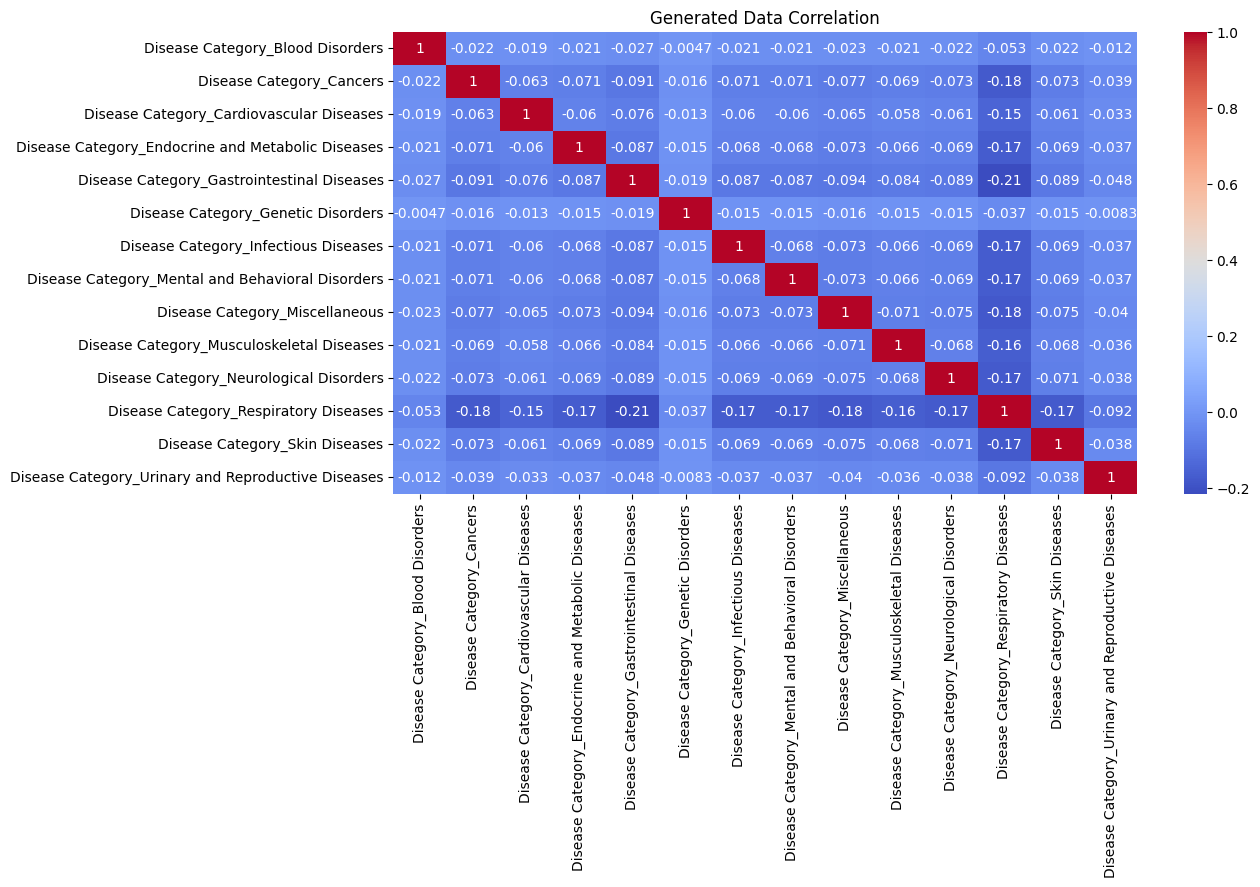

KS Statistic: 0.20408163265306123, p-value: 0.0005494923422856307
The correlation matrices are different
Chi-square Statistic: 88.13708888969484, p-value: 0.9999999587849999
The correlation matrices are the same


In [36]:
# Combine unique disease categories from both datasets
all_disease_categories = np.unique(np.concatenate((original_data['Disease Category'].unique(), generated_data_mistral['Disease Category'].unique())))

# One-hot encoding the combined disease categories
encoder = OneHotEncoder(categories=[all_disease_categories])
original_encoded = encoder.fit_transform(original_data[['Disease Category']]).toarray()
generated_encoded = encoder.transform(generated_data_mistral[['Disease Category']]).toarray()

# Creating DataFrames from the encoded data
original_encoded_df = pd.DataFrame(original_encoded, columns=encoder.get_feature_names_out(['Disease Category']))
generated_encoded_df = pd.DataFrame(generated_encoded, columns=encoder.get_feature_names_out(['Disease Category']))

# Calculate correlation matrices
original_corr = original_encoded_df.corr()
generated_corr = generated_encoded_df.corr()

# Plot correlation matrices
plt.figure(figsize=(12, 6))
sns.heatmap(original_corr, annot=True, cmap='coolwarm')
plt.title('Original Data Correlation')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(generated_corr, annot=True, cmap='coolwarm')
plt.title('Generated Data Correlation')
plt.show()

# Check if the correlation matrices are the same using KS test
ks_stat, p_val = ks_2samp(original_corr.values.flatten(), generated_corr.values.flatten())
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

# Check if the correlation matrices are the same using Chi-square test
chi2, p, dof, expected = chi2_contingency(np.abs(original_corr.values))
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

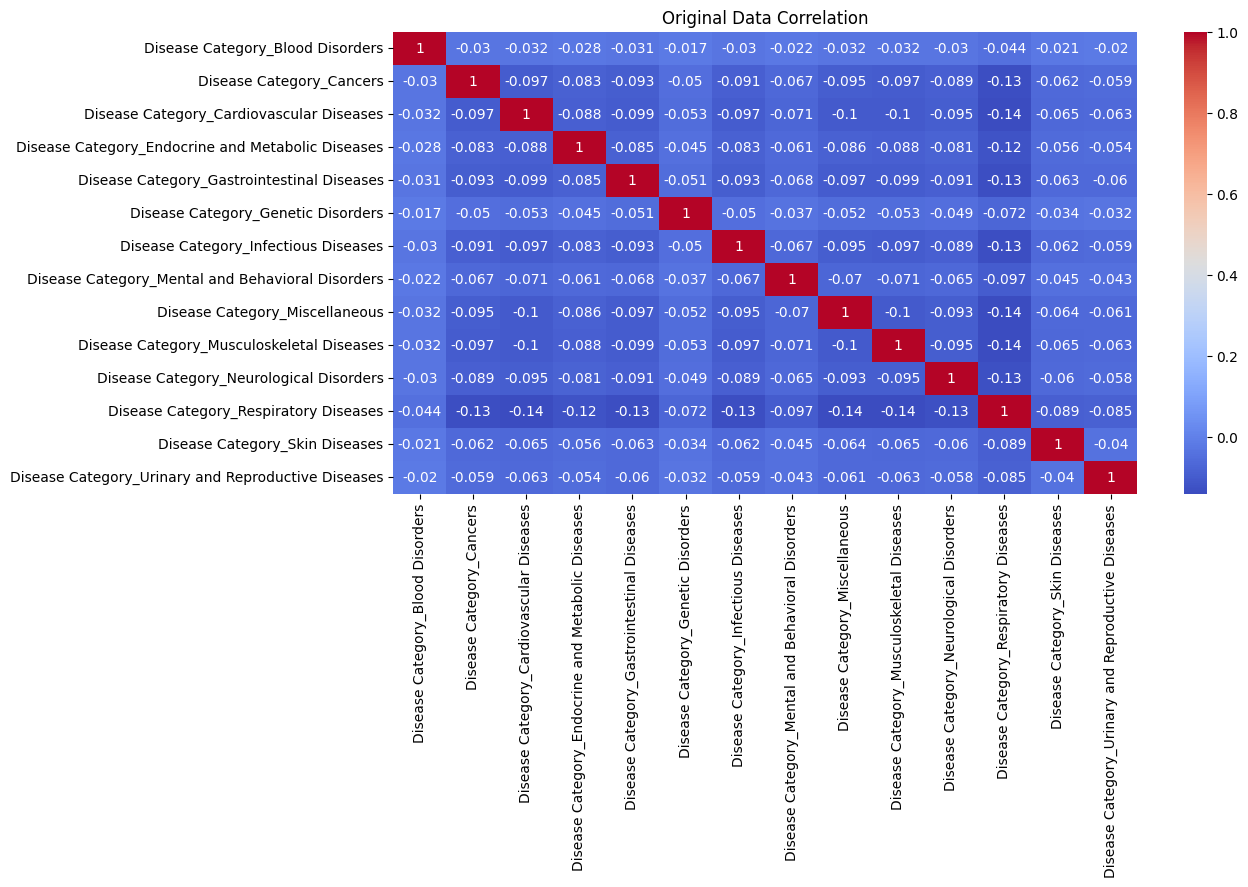

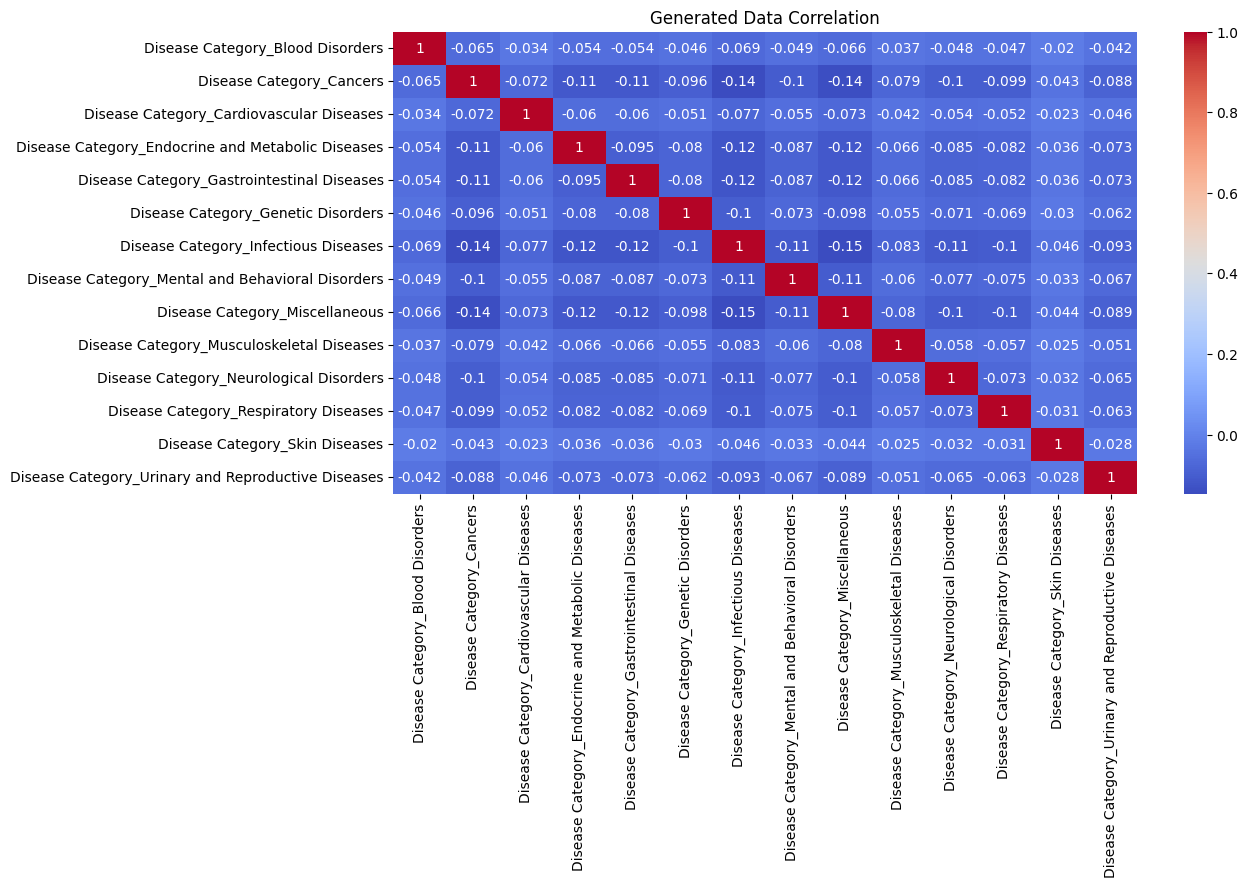

KS Statistic: 0.09183673469387756, p-value: 0.3810202229950478
The correlation matrices are the same
Chi-square Statistic: 88.13708888969484, p-value: 0.9999999587849999
The correlation matrices are the same


In [37]:
# Combine unique disease categories from both datasets
all_disease_categories = np.unique(np.concatenate((original_data['Disease Category'].unique(), generated_data_ctgan['Disease Category'].unique())))

# One-hot encoding the combined disease categories
encoder = OneHotEncoder(categories=[all_disease_categories])
original_encoded = encoder.fit_transform(original_data[['Disease Category']]).toarray()
generated_encoded = encoder.transform(generated_data_ctgan[['Disease Category']]).toarray()

# Creating DataFrames from the encoded data
original_encoded_df = pd.DataFrame(original_encoded, columns=encoder.get_feature_names_out(['Disease Category']))
generated_encoded_df = pd.DataFrame(generated_encoded, columns=encoder.get_feature_names_out(['Disease Category']))

# Calculate correlation matrices
original_corr = original_encoded_df.corr()
generated_corr = generated_encoded_df.corr()

# Plot correlation matrices
plt.figure(figsize=(12, 6))
sns.heatmap(original_corr, annot=True, cmap='coolwarm')
plt.title('Original Data Correlation')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(generated_corr, annot=True, cmap='coolwarm')
plt.title('Generated Data Correlation')
plt.show()

# Check if the correlation matrices are the same using KS test
ks_stat, p_val = ks_2samp(original_corr.values.flatten(), generated_corr.values.flatten())
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

# Check if the correlation matrices are the same using Chi-square test
chi2, p, dof, expected = chi2_contingency(np.abs(original_corr.values))
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

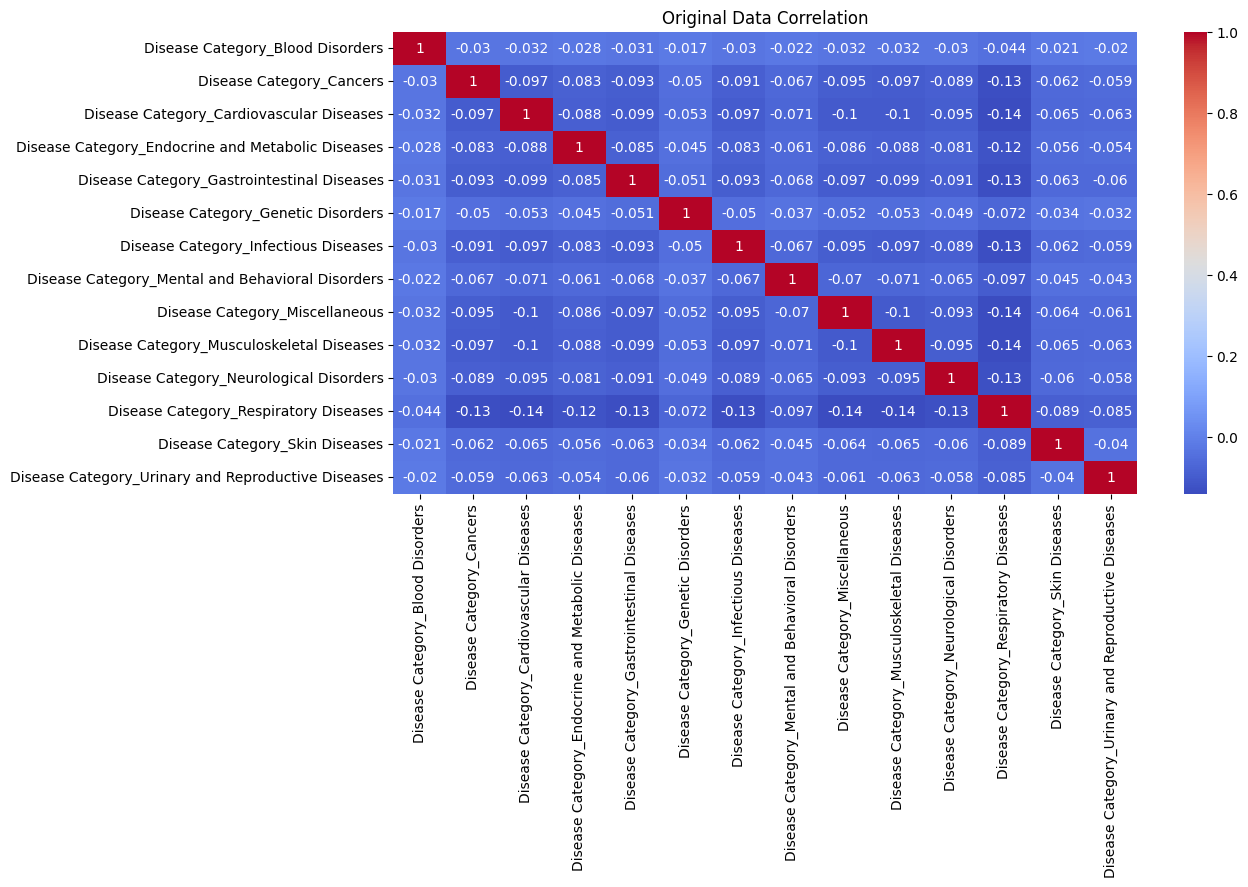

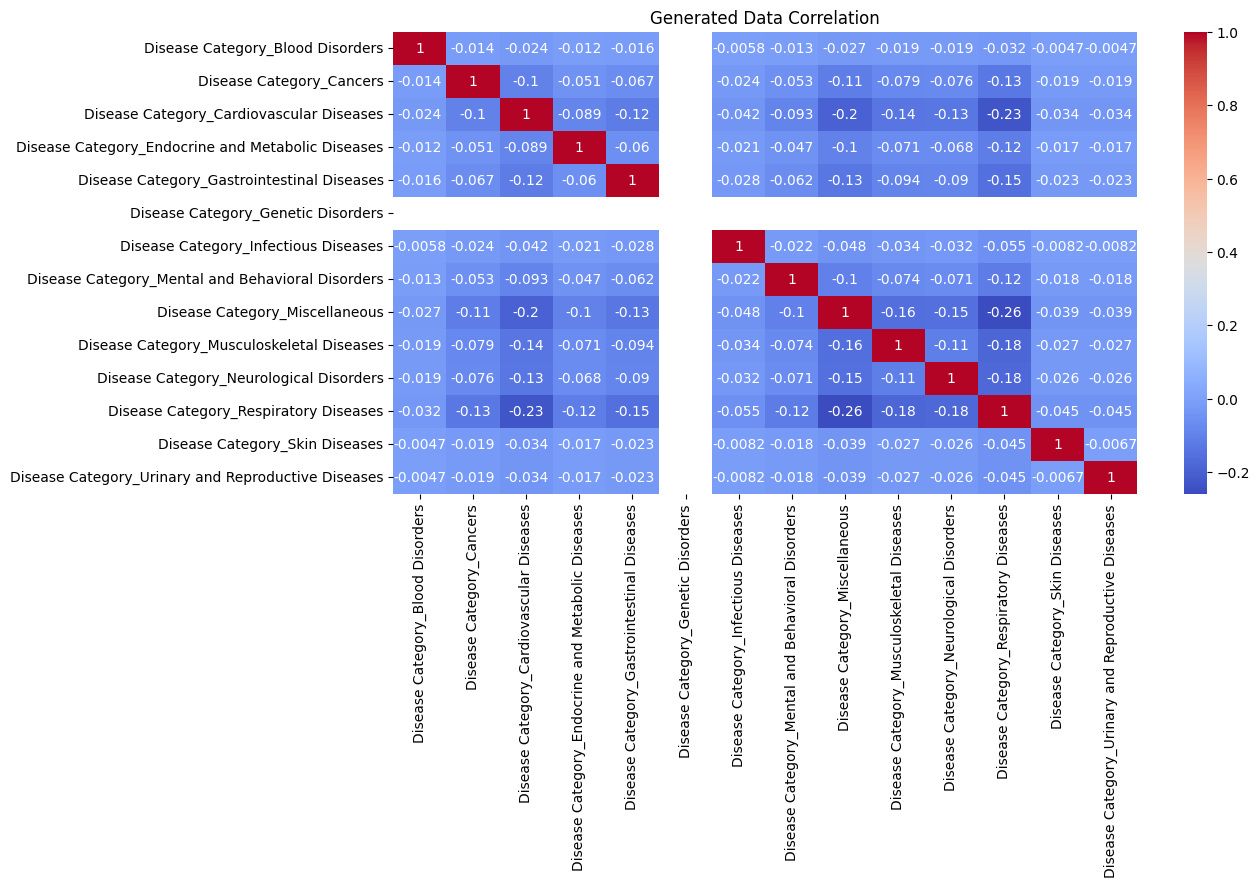

KS Statistic: 0.3877551020408163, p-value: 1.5712098384330253e-13
The correlation matrices are different
Chi-square Statistic: 88.13708888969484, p-value: 0.9999999587849999
The correlation matrices are the same


In [38]:
# Combine unique disease categories from both datasets
all_disease_categories = np.unique(np.concatenate((original_data['Disease Category'].unique(), generated_data_begreat['Disease Category'].unique())))

# One-hot encoding the combined disease categories
encoder = OneHotEncoder(categories=[all_disease_categories])
original_encoded = encoder.fit_transform(original_data[['Disease Category']]).toarray()
generated_encoded = encoder.transform(generated_data_begreat[['Disease Category']]).toarray()

# Creating DataFrames from the encoded data
original_encoded_df = pd.DataFrame(original_encoded, columns=encoder.get_feature_names_out(['Disease Category']))
generated_encoded_df = pd.DataFrame(generated_encoded, columns=encoder.get_feature_names_out(['Disease Category']))

# Calculate correlation matrices
original_corr = original_encoded_df.corr()
generated_corr = generated_encoded_df.corr()

# Plot correlation matrices
plt.figure(figsize=(12, 6))
sns.heatmap(original_corr, annot=True, cmap='coolwarm')
plt.title('Original Data Correlation')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(generated_corr, annot=True, cmap='coolwarm')
plt.title('Generated Data Correlation')
plt.show()

# Check if the correlation matrices are the same using KS test
ks_stat, p_val = ks_2samp(original_corr.values.flatten(), generated_corr.values.flatten())
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

# Check if the correlation matrices are the same using Chi-square test
chi2, p, dof, expected = chi2_contingency(np.abs(original_corr.values))
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

In [50]:
# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data[['Disease Category']])
original_encoded_df = pd.DataFrame(original_encoded.toarray(), columns=encoder.get_feature_names_out(['Disease Category']))
generated_encoded_df = pd.DataFrame(generated_encoded.toarray(), columns=encoder.get_feature_names_out(['Disease Category']))

# Drop the 'Disease Category' column from the original data
original_data = original_data.drop(columns=['Disease Category', 'Disease'])
generated_data = generated_data.drop(columns=['Disease Category', 'Disease'])

# Join the original data with the one-hot encoded data
original_data_encoded = original_data.join(original_encoded_df)
generated_data_encoded = generated_data.join(generated_encoded_df)

# Calculate the correlation
original_corr = original_data_encoded.corr()
generated_corr = generated_data_encoded.corr()

# Select the correlations with the one-hot encoded 'Disease Category' columns
original_corr = original_corr.loc[:, original_encoded_df.columns]
generated_corr = generated_corr.loc[:, generated_encoded_df.columns]

# Plot the correlation
plt.figure(figsize=(12, 6))
original_corr.mean().plot(kind='bar', color='blue', alpha=0.5)
generated_corr.mean().plot(kind='bar', color='red', alpha=0.5)
plt.title('Correlation with Disease Category')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'Yes'

### Count of diseases between the two datasets

Original Disease Counts: {'Respiratory Diseases': 501, 'Skin Diseases': 93, 'Endocrine and Metabolic Diseases': 150, 'Mental and Behavioral Disorders': 57, 'Cardiovascular Diseases': 123, 'Gastrointestinal Diseases': 243, 'Cancers': 111, 'Neurological Disorders': 111, 'Musculoskeletal Diseases': 159, 'Infectious Diseases': 111, 'Urinary and Reproductive Diseases': 57, 'Blood Disorders': 12, 'Genetic Disorders': 24, 'Miscellaneous': 18}


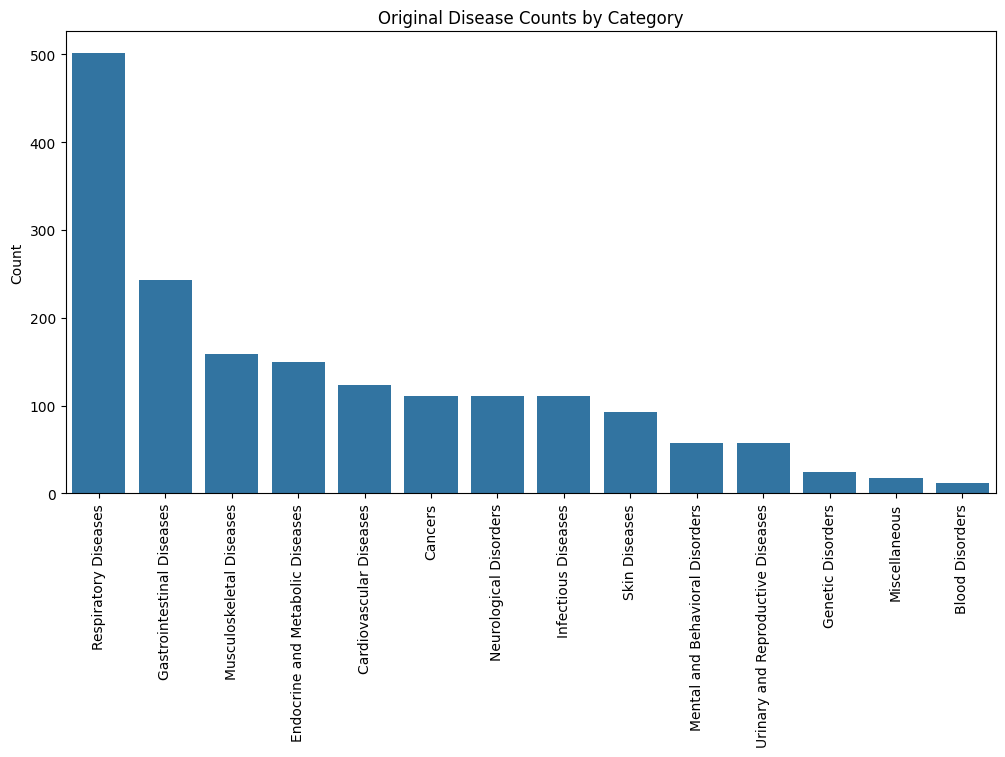

In [ ]:
# Classify the diseases in the original dataset
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)

# Classify the diseases in the generated dataset
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

# Print the counts of diseases in each category
print('Original Disease Counts:', categories_count)

# Plot the counts of diseases in each category and order by number of counts
plt.figure(figsize=(12, 6))
sns.barplot(x=list(categories_count.keys()), y=list(categories_count.values()), order=sorted(categories_count, key=categories_count.get, reverse=True))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Original Disease Counts by Category')
plt.show()


### Calculate the chi-square statistic and p-value for the disease categories


In [ ]:
# Calculate the chi-square statistic and p-value for the disease categories
chi2_stat, p_val, _, _ = chi2_contingency(
    pd.crosstab(original_data['Disease Category'], generated_data['Disease Category'])
)

# Print the chi-square statistic and p-value
print('Chi-Square Statistic:', chi2_stat)
print('P-Value:', p_val)

Chi-Square Statistic: 156.16537019802917
P-Value: 0.2133239942303504


### Calculate the Kolmogorov-Smirnov statistic and p-value for the disease categories


KS Statistic: 0.39285714285714285
P-Value: 0.2058202263478882


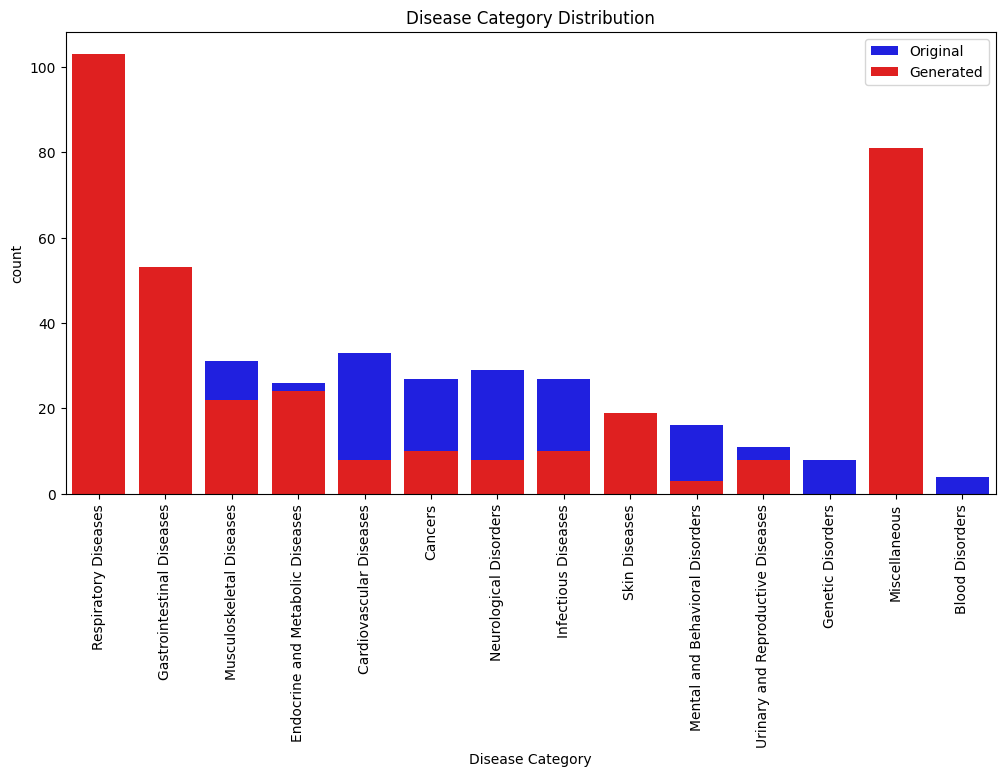

In [ ]:
# Calculate the Kolmogorov-Smirnov statistic and p-value for the disease categories

ks_stat, p_val = ks_2samp(
    original_data['Disease Category'].value_counts(normalize=True),
    generated_data['Disease Category'].value_counts(normalize=True)
)

# Print the Kolmogorov-Smirnov statistic and p-value
print('KS Statistic:', ks_stat)
print('P-Value:', p_val)

# Plot the distribution of disease categories in the original and generated datasets and order by number of counts
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease Category', data=original_data, color='blue', order=sorted(categories_count, key=categories_count.get, reverse=True))
sns.countplot(x='Disease Category', data=generated_data, color='red', order=sorted(categories_count, key=categories_count.get, reverse=True))
plt.xticks(rotation=90)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.show()

# Dimensionality Reduction and Visualization


## T-SNE Visualisation

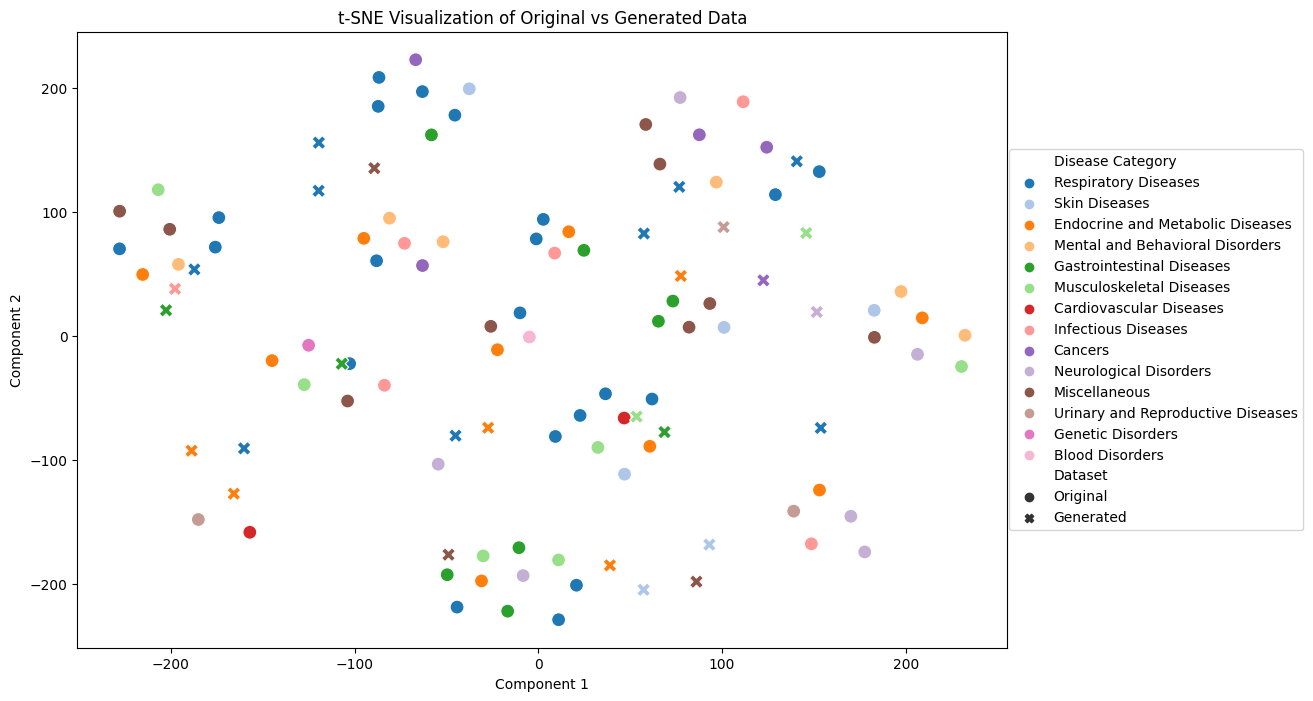

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Assuming original_data and generated_data are your datasets

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data_llama3[['Disease Category']])
original_encoded = original_encoded.toarray()
generated_encoded = generated_encoded.toarray()

# Perform t-SNE on the one-hot encoded data
tsne = TSNE(n_components=2, random_state=42)
original_tsne = tsne.fit_transform(original_encoded)
generated_tsne = tsne.fit_transform(generated_encoded)

# Create a combined DataFrame for easier plotting
import pandas as pd
original_df = pd.DataFrame(original_tsne, columns=['Component 1', 'Component 2'])
original_df['Dataset'] = 'Original'
original_df['Disease Category'] = original_data['Disease Category']

generated_df = pd.DataFrame(generated_tsne, columns=['Component 1', 'Component 2'])
generated_df['Dataset'] = 'Generated'
generated_df['Disease Category'] = generated_data_llama3['Disease Category']

combined_df = pd.concat([original_df, generated_df])

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Disease Category', style='Dataset', palette='tab20', data=combined_df, markers=True, s=100)
plt.title('t-SNE Visualization of Original vs Generated Data')
# make the legend smaller
plt.legend(loc='center', bbox_to_anchor=(1.16, 0.5), ncol=1)
plt.show()


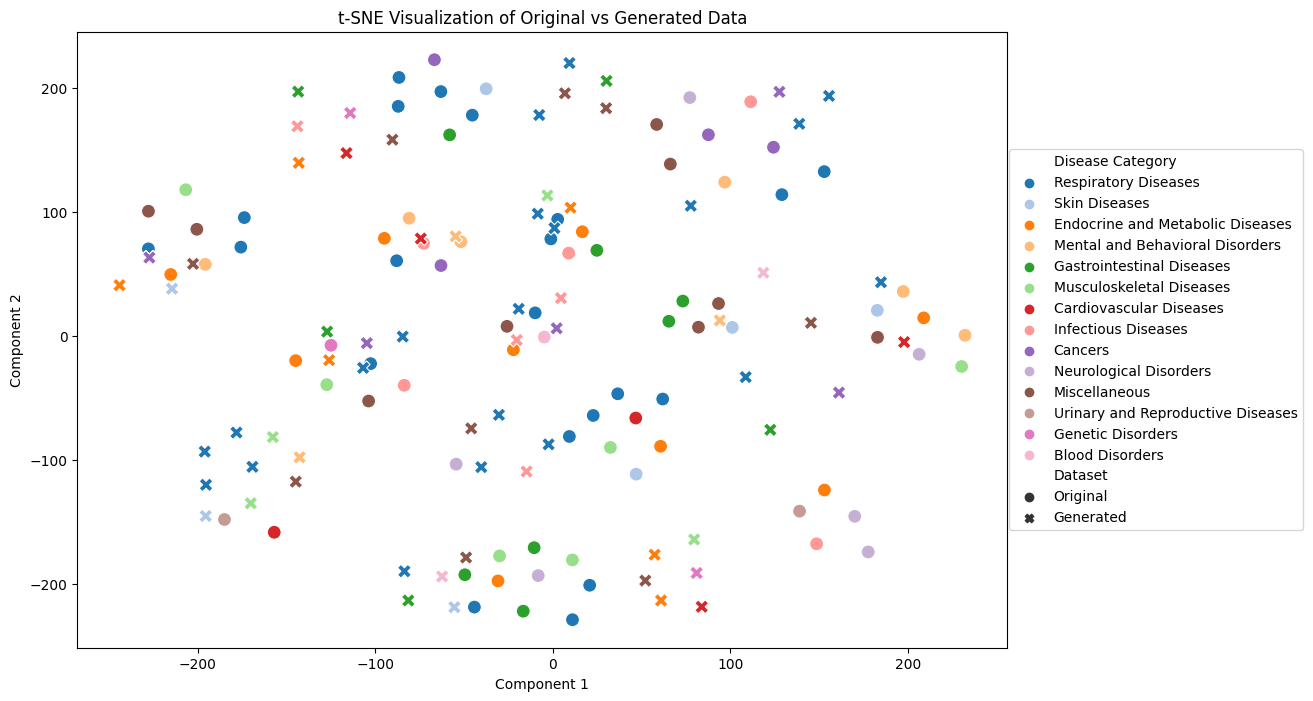

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Assuming original_data and generated_data are your datasets

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data_mistral[['Disease Category']])
original_encoded = original_encoded.toarray()
generated_encoded = generated_encoded.toarray()

# Perform t-SNE on the one-hot encoded data
tsne = TSNE(n_components=2, random_state=42)
original_tsne = tsne.fit_transform(original_encoded)
generated_tsne = tsne.fit_transform(generated_encoded)

# Create a combined DataFrame for easier plotting
import pandas as pd
original_df = pd.DataFrame(original_tsne, columns=['Component 1', 'Component 2'])
original_df['Dataset'] = 'Original'
original_df['Disease Category'] = original_data['Disease Category']

generated_df = pd.DataFrame(generated_tsne, columns=['Component 1', 'Component 2'])
generated_df['Dataset'] = 'Generated'
generated_df['Disease Category'] = generated_data_mistral['Disease Category']

combined_df = pd.concat([original_df, generated_df])

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Disease Category', style='Dataset', palette='tab20', data=combined_df, markers=True, s=100)
plt.title('t-SNE Visualization of Original vs Generated Data')
# make the legend smaller
plt.legend(loc='center', bbox_to_anchor=(1.16, 0.5), ncol=1)
plt.show()


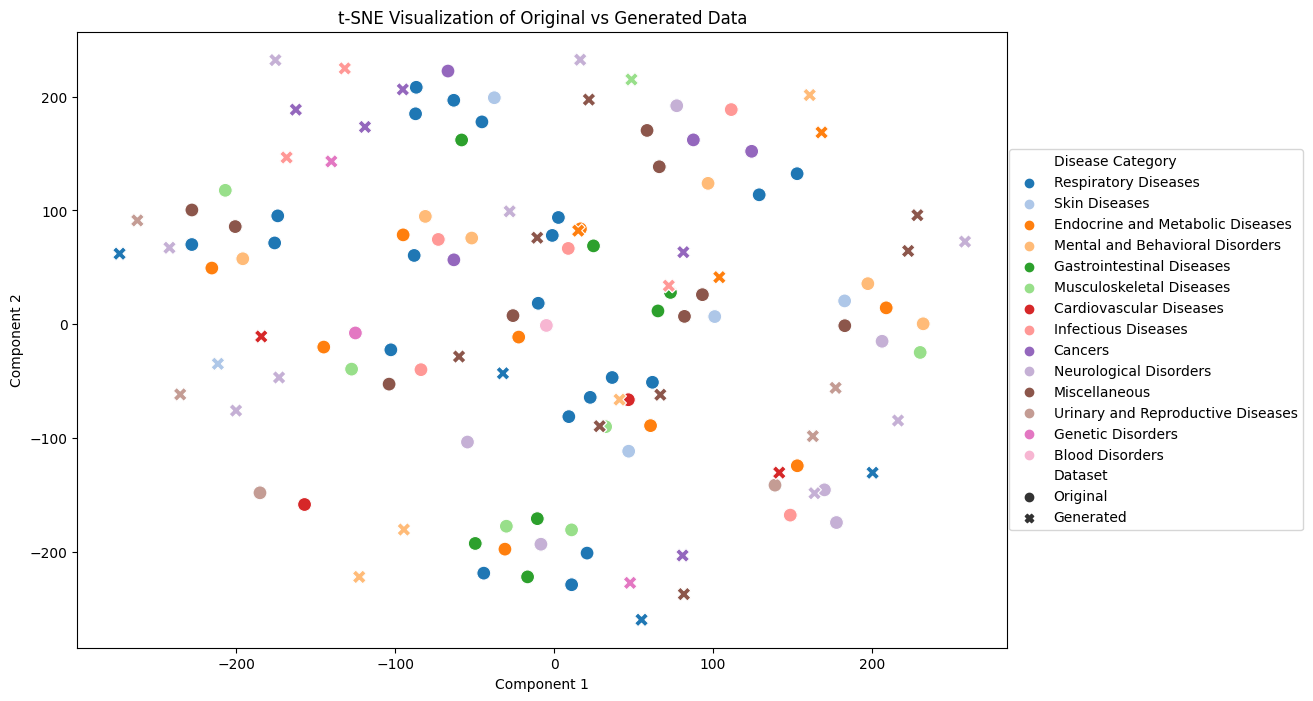

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Assuming original_data and generated_data are your datasets

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data_ctgan[['Disease Category']])
original_encoded = original_encoded.toarray()
generated_encoded = generated_encoded.toarray()

# Perform t-SNE on the one-hot encoded data
tsne = TSNE(n_components=2, random_state=42)
original_tsne = tsne.fit_transform(original_encoded)
generated_tsne = tsne.fit_transform(generated_encoded)

# Create a combined DataFrame for easier plotting
import pandas as pd
original_df = pd.DataFrame(original_tsne, columns=['Component 1', 'Component 2'])
original_df['Dataset'] = 'Original'
original_df['Disease Category'] = original_data['Disease Category']

generated_df = pd.DataFrame(generated_tsne, columns=['Component 1', 'Component 2'])
generated_df['Dataset'] = 'Generated'
generated_df['Disease Category'] = generated_data_ctgan['Disease Category']

combined_df = pd.concat([original_df, generated_df])

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Disease Category', style='Dataset', palette='tab20', data=combined_df, markers=True, s=100)
plt.title('t-SNE Visualization of Original vs Generated Data')
# make the legend smaller
plt.legend(loc='center', bbox_to_anchor=(1.16, 0.5), ncol=1)
plt.show()


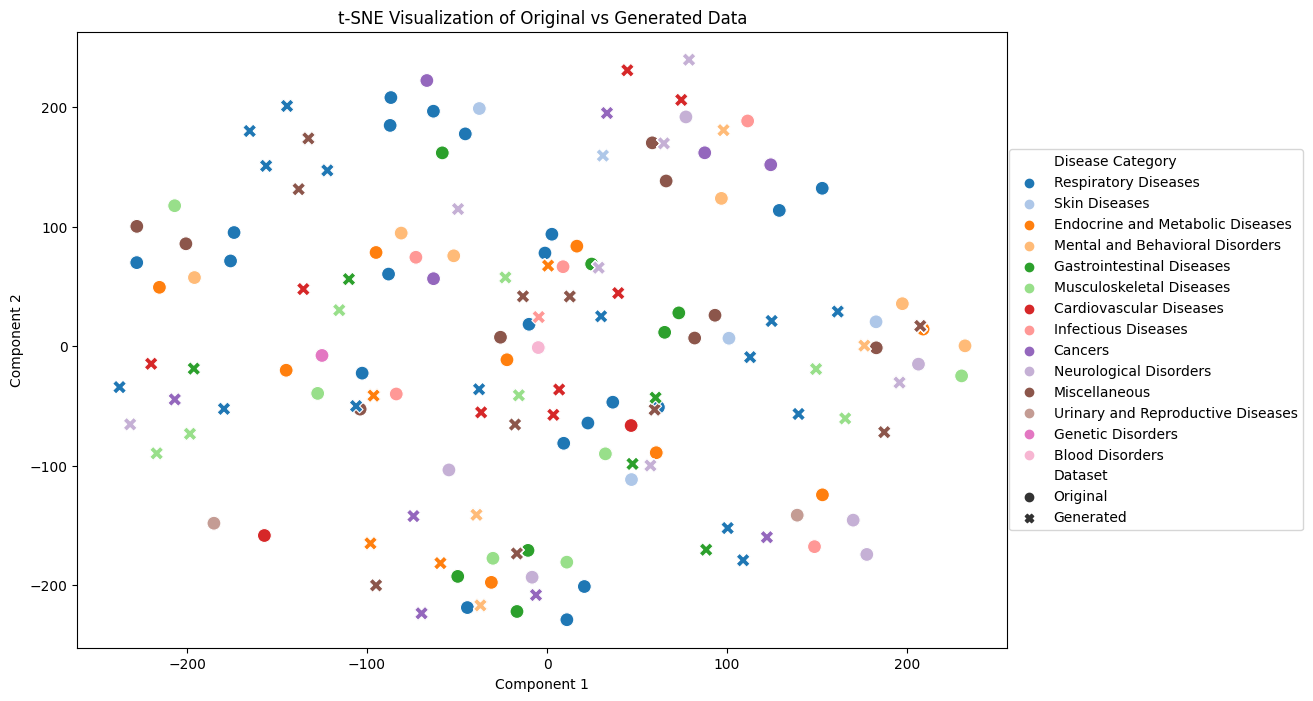

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Assuming original_data and generated_data are your datasets

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data_begreat[['Disease Category']])
original_encoded = original_encoded.toarray()
generated_encoded = generated_encoded.toarray()

# Perform t-SNE on the one-hot encoded data
tsne = TSNE(n_components=2, random_state=42)
original_tsne = tsne.fit_transform(original_encoded)
generated_tsne = tsne.fit_transform(generated_encoded)

# Create a combined DataFrame for easier plotting
import pandas as pd
original_df = pd.DataFrame(original_tsne, columns=['Component 1', 'Component 2'])
original_df['Dataset'] = 'Original'
original_df['Disease Category'] = original_data['Disease Category']

generated_df = pd.DataFrame(generated_tsne, columns=['Component 1', 'Component 2'])
generated_df['Dataset'] = 'Generated'
generated_df['Disease Category'] = generated_data_begreat['Disease Category']

combined_df = pd.concat([original_df, generated_df])

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Disease Category', style='Dataset', palette='tab20', data=combined_df, markers=True, s=100)
plt.title('t-SNE Visualization of Original vs Generated Data')
# make the legend smaller
plt.legend(loc='center', bbox_to_anchor=(1.16, 0.5), ncol=1)
plt.show()


## PCA

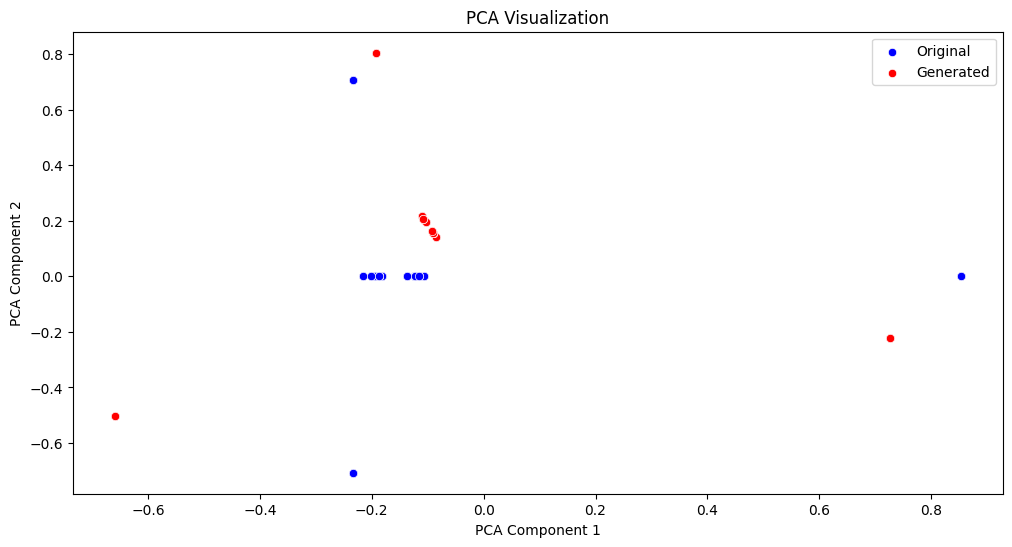

In [ ]:
# Principal Component Analysis (PCA) Visualisation
from sklearn.decomposition import PCA

# Perform PCA on the one-hot encoded data
pca = PCA(n_components=2)
original_pca = pca.fit_transform(original_encoded)
generated_pca = pca.fit_transform(generated_encoded)

# Plot the PCA visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=original_pca[:, 0], y=original_pca[:, 1], color='blue')
sns.scatterplot(x=generated_pca[:, 0], y=generated_pca[:, 1], color='red')
plt.title('PCA Visualization')
plt.legend(['Original', 'Generated'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

